In [1486]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1487]:
#Cargar archivo csv desde seaborn
df= pd.read_csv('Mexico_Entire-Home-Apt.csv')
df.head(5)

Unnamed: 0.1  Unnamed: 0                          listing_url last_scraped  \
0             0           0   https://www.airbnb.com/rooms/35797   2024-09-25   
1             1           1   https://www.airbnb.com/rooms/44616   2024-09-26   
2             2           2   https://www.airbnb.com/rooms/67703   2024-09-26   
3             3           3   https://www.airbnb.com/rooms/70644   2024-09-25   
4             4           4  https://www.airbnb.com/rooms/107078   2024-09-25   

                                         description  \
0  Dentro de Villa un estudio de arte con futon, ...   
1  A new concept of hosting in mexico through a b...   
2  Comfortably furnished, sunny, 2 bedroom apt., ...   
3  COYOACAN designer studio quiet & safe! well eq...   
4  Is the best ever place triple L <br />Location...   

                                   host_url  host_since  host_response_time  \
0  https://www.airbnb.com/users/show/153786  2010-06-28  a few days or more   
1  https://www.airbnb.com/users/show/196253  2010-08-09      within an hour   
2  https://www.airbnb.com/users/show/334451  2011-01-04      within an hour   
3  https://www.airbnb.com/users/show/212109  2010-08-24  within a few hours   
4  https://www.airbnb.com/users/show/540705  2011-04-27      within an hour   

  host_response_rate              host_acceptance_rate  ...  \
0                 0%  No contiene host_acceptance_rate  ...   
1               100%                               93%  ...   
2                71%                               57%  ...   
3               100%                              100%  ...   
4               100%                              100%  ...   

  review_scores_accuracy review_scores_cleanliness review_scores_checkin  \
0                   4.79                      4.76                  4.84   
1                   4.88                      4.70                  4.87   
2                   4.81                      4.75                  4.94   
3                   4.90                      4.96                  4.96   
4                   5.00                      5.00                  5.00   

  review_scores_communication review_scores_location  \
0                        4.83                   4.85   
1                        4.78                   4.98   
2                        4.92                   4.98   
3                        4.98                   4.96   
4                        4.92                   4.91   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                            1.0                                         1.0   
1                            8.0                                         4.0   
2                            2.0                                         2.0   
3                            3.0                                         2.0   
4                            3.0                                         3.0   

  calculated_host_listings_count_private_rooms  \
0                                          0.0   
1                                          1.0   
2                                          0.0   
3                                          1.0   
4                                          0.0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                         0.0              1.74  
1                                         0.0              0.41  
2                                         0.0              0.31  
3                                         0.0              0.83  
4                                         0.0              0.11  

[5 rows x 52 columns]

In [1488]:
# Eliminar columnas 'Unnamed: 0' y 'Unnamed 01' si están presentes en el DataFrame
df = df.drop(columns=[col for col in ['Unnamed: 0', 'Unnamed 0.1'] if col in df.columns])

# Verificar que las columnas han sido eliminadas
print("Columnas actuales en el DataFrame:", df.columns)


Columnas actuales en el DataFrame: Index(['Unnamed: 0.1', 'listing_url', 'last_scraped', 'description',
       'host_url', 'host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_verifications',
       'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed',
       'property_type', 'room_type', 'amenities', 'has_availability',
       'calendar_last_scraped', 'first_review', 'last_review', 'license',
       'instant_bookable', 'id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price', 'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 

In [1489]:
# Identificar columnas con valores 't' y 'f'
bool_columns = df.columns[df.isin(['t', 'f']).any()]

# Reemplazar 't' por 1 y 'f' por 2 en esas columnas
df[bool_columns] = df[bool_columns].replace({'t': 1, 'f': 2})

C:\Users\joker\AppData\Local\Temp\ipykernel_4088\746722446.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[bool_columns] = df[bool_columns].replace({'t': 1, 'f': 2})


In [1490]:
# Reemplazar valores faltantes y convertir a número
df["host_acceptance_rate"] = df["host_acceptance_rate"].astype(str)  # Convertir todo a string
df["host_acceptance_rate"] = df["host_acceptance_rate"].replace("No contiene host_acceptance_rate", "0%")
df["host_acceptance_rate"] = df["host_acceptance_rate"].str.rstrip("%").astype(float) / 100  # Eliminar "%" y convertir a float

# Verificar que ahora sean valores numéricos
print(df["host_acceptance_rate"].dtype)  # Debe ser float

float64


In [1491]:
# Identificar columnas de tipo string
string_columns = df.select_dtypes(include=['object']).columns

In [1492]:

# Mostrar las columnas detectadas
print("Columnas de tipo string detectadas:")
print(string_columns)


Columnas de tipo string detectadas:
Index(['listing_url', 'last_scraped', 'description', 'host_url', 'host_since',
       'host_response_time', 'host_response_rate', 'host_verifications',
       'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type',
       'amenities', 'calendar_last_scraped', 'first_review', 'last_review',
       'license'],
      dtype='object')


<Axes: xlabel='id', ylabel='host_id'>

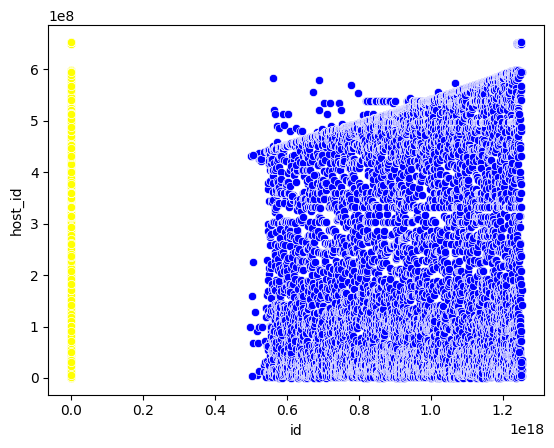

In [1493]:
#Imprimimos el scatter plot entre la variable dependiente "host_id" e independiente "host_id"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='id',y='host_id',color='blue',data=df)
sns.scatterplot(x='instant_bookable',y='host_id',color='red',data=df)
sns.scatterplot(x='minimum_nights',y='host_id',color='yellow',data=df)

In [1494]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['id','instant_bookable','minimum_nights']]
Var_Dep = df['host_id']

In [1495]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [1496]:
type(model)

sklearn.linear_model._base.LinearRegression

In [1497]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)


LinearRegression()

In [1498]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['id', 'instant_bookable', 'minimum_nights'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([1.48315119e-10, 0.00000000e+00, 0.00000000e+00]),
 'rank_': 1,
 'singular_': array([6.39479278e+19, 8.74249218e+01, 6.13687346e+01]),
 'intercept_': np.float64(130249415.11794731)}

**Modelo matemático: y= 0.62534291x1 + 0.01978015x2 + 0.81582765x3 + 1.2098448339476615**

In [1499]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.14813642991039921

In [1500]:
#Predecimos los valores de total de accidentes a partir de las variables: "host_is_superhost", "host_identity_verified" y "bathrooms"
y_pred= model.predict(X=df[['id', 'instant_bookable', 'minimum_nights']])
y_pred

array([1.30249415e+08, 1.30249415e+08, 1.30249415e+08, ...,
       3.15905767e+08, 3.15910424e+08, 3.15973932e+08], shape=(17363,))

In [1501]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones', y_pred)
df

Predicciones  Unnamed: 0.1  \
0      1.302494e+08             0   
1      1.302494e+08             1   
2      1.302494e+08             2   
3      1.302494e+08             3   
4      1.302494e+08             4   
...             ...           ...   
17358  3.158846e+08         26572   
17359  3.158869e+08         26573   
17360  3.159058e+08         26574   
17361  3.159104e+08         26575   
17362  3.159739e+08         26581   

                                            listing_url last_scraped  \
0                    https://www.airbnb.com/rooms/35797   2024-09-25   
1                    https://www.airbnb.com/rooms/44616   2024-09-26   
2                    https://www.airbnb.com/rooms/67703   2024-09-26   
3                    https://www.airbnb.com/rooms/70644   2024-09-25   
4                   https://www.airbnb.com/rooms/107078   2024-09-25   
...                                                 ...          ...   
17358  https://www.airbnb.com/rooms/1251627039124173262   2024-09-25   
17359  https://www.airbnb.com/rooms/1251642490491185216   2024-09-25   
17360  https://www.airbnb.com/rooms/1251769567383709085   2024-09-25   
17361  https://www.airbnb.com/rooms/1251800961446133530   2024-09-26   
17362  https://www.airbnb.com/rooms/1252229157495978163   2024-09-25   

                                             description  \
0      Dentro de Villa un estudio de arte con futon, ...   
1      A new concept of hosting in mexico through a b...   
2      Comfortably furnished, sunny, 2 bedroom apt., ...   
3      COYOACAN designer studio quiet & safe! well eq...   
4      Is the best ever place triple L <br />Location...   
...                                                  ...   
17358  Have fun with the whole family at this stylish...   
17359  This unique place has its own style. Located i...   
17360  Apartment with 1 bedroom and queen size bed, k...   
17361  Discover a refined urban escape in Polanco wit...   
17362  Known as New Polanco, the Granada colony has p...   

                                          host_url  host_since  \
0         https://www.airbnb.com/users/show/153786  2010-06-28   
1         https://www.airbnb.com/users/show/196253  2010-08-09   
2         https://www.airbnb.com/users/show/334451  2011-01-04   
3         https://www.airbnb.com/users/show/212109  2010-08-24   
4         https://www.airbnb.com/users/show/540705  2011-04-27   
...                                            ...         ...   
17358  https://www.airbnb.com/users/show/653494962  2024-09-22   
17359  https://www.airbnb.com/users/show/652781543  2024-09-18   
17360  https://www.airbnb.com/users/show/376814072  2020-11-24   
17361  https://www.airbnb.com/users/show/237937785  2019-01-20   
17362    https://www.airbnb.com/users/show/6522855  2013-05-22   

       host_response_time              host_response_rate  \
0      a few days or more                              0%   
1          within an hour                            100%   
2          within an hour                             71%   
3      within a few hours                            100%   
4          within an hour                            100%   
...                   ...                             ...   
17358      within an hour  No contiene host_response_rate   
17359      within an hour  No contiene host_response_rate   
17360      within an hour  No contiene host_response_rate   
17361      within an hour                            100%   
17362      within an hour                            100%   

       host_acceptance_rate  ...  review_scores_accuracy  \
0                      0.00  ...                    4.79   
1                      0.93  ...                    4.88   
2                      0.57  ...                    4.81   
3                      1.00  ...                    4.90   
4                      1.00  ...                    5.00   
...                     ...  ...                     ...   
17358                  0.00  .

<Axes: xlabel='id', ylabel='host_id'>

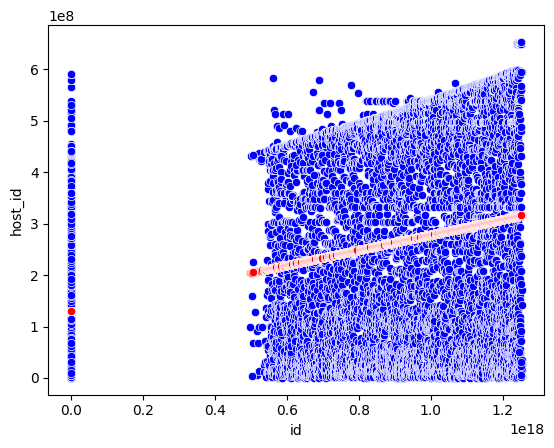

In [1502]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='id', y='host_id', color="blue", data=df)
sns.scatterplot(x='id', y='Predicciones', color="red", data=df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [1503]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.14813642991039921

In [1504]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.38488495672135487)

In [1505]:
#Eliminamos las columnas tipo String para poder realizar la regresión lineal
df = df.drop(['listing_url', 'last_scraped', 'host_url', 'host_since',
       'host_response_time', 'host_verifications', 'neighbourhood',
       'neighbourhood_cleansed', 'property_type', 'amenities','description',
       'calendar_last_scraped', 'first_review', 'last_review', 'license'], axis=1)

df.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17363 entries, 0 to 17362
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Predicciones                                  17363 non-null  float64
 1   Unnamed: 0.1                                  17363 non-null  int64  
 2   host_response_rate                            17363 non-null  object 
 3   host_acceptance_rate                          17363 non-null  float64
 4   host_is_superhost                             17363 non-null  int64  
 5   host_identity_verified                        17363 non-null  int64  
 6   room_type                                     17363 non-null  object 
 7   has_availability                              17363 non-null  int64  
 8   instant_bookable                              17363 non-null  int64  
 9   id                                            17363 non-null 

In [1506]:
# Identificar columnas que siguen siendo de tipo objeto
non_numeric_columns = df.select_dtypes(include=['object']).columns

# Mostrar algunos valores de estas columnas
for col in non_numeric_columns:
    print(f"Valores en la columna {col}:")
    print(df[col].unique()[:10])  # Muestra los primeros 10 valores únicos


Valores en la columna host_response_rate:
['0%' '100%' '71%' '90%' 'No contiene host_response_rate' '66%' '83%'
 '91%' '88%' '89%']
Valores en la columna room_type:
['Entire home/apt']


In [1507]:
# Verificar que las columnas han sido eliminadas
print("Columnas actuales en el DataFrame:", df.columns)

Columnas actuales en el DataFrame: Index(['Predicciones', 'Unnamed: 0.1', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_identity_verified',
       'room_type', 'has_availability', 'instant_bookable', 'id', 'host_id',
       'host_listings_count', 'host_total_listings_count', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights',
       'maximum_nights', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object')


In [1508]:
# Identificar columnas que contienen valores en formato de porcentaje
percentage_columns = [col for col in df.select_dtypes(include=['object']).columns 
                      if df[col].astype(str).str.contains('%').any()]

# Convertir valores de porcentaje a decimal
for col in percentage_columns:
    df[col] = df[col].str.replace('%', '', regex=True)  # Eliminar '%'
    df[col] = pd.to_numeric(df[col], errors='coerce') / 100  # Convertir a número en decimal

# Verificar que la conversión fue exitosa
print("Columnas convertidas a decimal:", percentage_columns)
print(df[percentage_columns].head())  # Muestra los primeros valores convertidos

Columnas convertidas a decimal: ['host_response_rate']
   host_response_rate
0                0.00
1                1.00
2                0.71
3                1.00
4                1.00


In [1509]:
# Reemplazar 'Entire home/apt' por el número 1 en todas las columnas donde aparezca
df = df.replace('Entire home/apt', 1)

# Verificar si el reemplazo fue exitoso
print(df.head())


   Predicciones  Unnamed: 0.1  host_response_rate  host_acceptance_rate  \
0  1.302494e+08             0                0.00                  0.00   
1  1.302494e+08             1                1.00                  0.93   
2  1.302494e+08             2                0.71                  0.57   
3  1.302494e+08             3                1.00                  1.00   
4  1.302494e+08             4                1.00                  1.00   

   host_is_superhost  host_identity_verified  room_type  has_availability  \
0                  2                       1          1                 1   
1                  1                       1          1                 1   
2                  1                       1          1                 1   
3                  1                       1          1                 1   
4                  1                       1          1                 1   

   instant_bookable      id  ...  review_scores_accuracy  \
0                 2   3579

C:\Users\joker\AppData\Local\Temp\ipykernel_4088\2540725974.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('Entire home/apt', 1)


In [1510]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors = df.corr()
Corr_Factors

Predicciones  Unnamed: 0.1  \
Predicciones                                      1.000000      0.945858   
Unnamed: 0.1                                      0.945858      1.000000   
host_response_rate                                0.034922      0.029103   
host_acceptance_rate                              0.136854      0.137664   
host_is_superhost                                -0.001483      0.014700   
host_identity_verified                           -0.067601     -0.066643   
room_type                                              NaN           NaN   
has_availability                                 -0.044346     -0.042985   
instant_bookable                                 -0.199933     -0.213561   
id                                                1.000000      0.945858   
host_id                                           0.384885      0.423006   
host_listings_count                               0.078661      0.087138   
host_total_listings_count                         0.055702      0.061407   
accommodates                                     -0.003262     -0.008780   
bathrooms                                         0.026285      0.021131   
bedrooms                                         -0.004203     -0.009792   
beds                                             -0.047475     -0.051227   
price                                             0.104098      0.094874   
minimum_nights                                   -0.148562     -0.161872   
maximum_nights                                   -0.271543     -0.263858   
availability_30                                   0.142054      0.153621   
availability_60                                   0.152813      0.165224   
availability_90                                   0.079504      0.095662   
availability_365                                  0.102669      0.104537   
number_of_reviews                                -0.370670     -0.383495   
number_of_reviews_ltm                            -0.090766     -0.111767   
number_of_reviews_l30d                            0.071126      0.069200   
review_scores_accuracy                            0.079548      0.076829   
review_scores_cleanliness                         0.095479      0.092865   
review_scores_checkin                             0.056245      0.047070   
review_scores_communication                       0.044378      0.035565   
review_scores_location                            0.066219      0.060155   
calculated_host_listings_count                    0.067831      0.072016   
calculated_host_listings_count_entire_homes       0.035929      0.042293   
calculated_host_listings_count_private_rooms      0.037010      0.037194   
calculated_host_listings_count_shared_rooms            NaN           NaN   
reviews_per_month                                 0.134152      0.140910   

                                              host_response_rate  \
Predicciones                                            0.034922   
Unnamed: 0.1                                            0.029103   
host_response_rate                                      1.000000   
host_acceptance_rate                                    0.606712   
host_is_superhost                                      -0.223419   
host_identity_verified                                 -0.003100   
room_type                                                    NaN   
has_availability                                       -0.114504   
instant_bookable                                       -0.147348   
id                                                      0.034922   
host_id                                                -0.015266   
host_listings_count                                     0.106163   
host_total_listings_count                               0.088135   
accommodates                                            0.008803   
bathrooms                                               0.014773   
bedrooms                                               -0.023753   
b

In [1511]:
#Encontramos el valor absoluto de las todas correlaciones
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

Predicciones  Unnamed: 0.1  \
Predicciones                                      1.000000      0.945858   
Unnamed: 0.1                                      0.945858      1.000000   
host_response_rate                                0.034922      0.029103   
host_acceptance_rate                              0.136854      0.137664   
host_is_superhost                                 0.001483      0.014700   
host_identity_verified                            0.067601      0.066643   
room_type                                              NaN           NaN   
has_availability                                  0.044346      0.042985   
instant_bookable                                  0.199933      0.213561   
id                                                1.000000      0.945858   
host_id                                           0.384885      0.423006   
host_listings_count                               0.078661      0.087138   
host_total_listings_count                         0.055702      0.061407   
accommodates                                      0.003262      0.008780   
bathrooms                                         0.026285      0.021131   
bedrooms                                          0.004203      0.009792   
beds                                              0.047475      0.051227   
price                                             0.104098      0.094874   
minimum_nights                                    0.148562      0.161872   
maximum_nights                                    0.271543      0.263858   
availability_30                                   0.142054      0.153621   
availability_60                                   0.152813      0.165224   
availability_90                                   0.079504      0.095662   
availability_365                                  0.102669      0.104537   
number_of_reviews                                 0.370670      0.383495   
number_of_reviews_ltm                             0.090766      0.111767   
number_of_reviews_l30d                            0.071126      0.069200   
review_scores_accuracy                            0.079548      0.076829   
review_scores_cleanliness                         0.095479      0.092865   
review_scores_checkin                             0.056245      0.047070   
review_scores_communication                       0.044378      0.035565   
review_scores_location                            0.066219      0.060155   
calculated_host_listings_count                    0.067831      0.072016   
calculated_host_listings_count_entire_homes       0.035929      0.042293   
calculated_host_listings_count_private_rooms      0.037010      0.037194   
calculated_host_listings_count_shared_rooms            NaN           NaN   
reviews_per_month                                 0.134152      0.140910   

                                              host_response_rate  \
Predicciones                                            0.034922   
Unnamed: 0.1                                            0.029103   
host_response_rate                                      1.000000   
host_acceptance_rate                                    0.606712   
host_is_superhost                                       0.223419   
host_identity_verified                                  0.003100   
room_type                                                    NaN   
has_availability                                        0.114504   
instant_bookable                                        0.147348   
id                                                      0.034922   
host_id                                                 0.015266   
host_listings_count                                     0.106163   
host_total_listings_count                               0.088135   
accommodates                                            0.008803   
bathrooms                                               0.014773   
bedrooms                                                0.023753   
b

In [1512]:
Corr_Factors1= Corr_Factors1['host_id'].sort_values(ascending=False)
Corr_Factors1

host_id                                         1.000000
Unnamed: 0.1                                    0.423006
Predicciones                                    0.384885
id                                              0.384885
instant_bookable                                0.153013
minimum_nights                                  0.148499
availability_60                                 0.144785
availability_30                                 0.135779
number_of_reviews                               0.127870
availability_90                                 0.127715
availability_365                                0.102212
host_is_superhost                               0.070948
calculated_host_listings_count                  0.069178
reviews_per_month                               0.055720
host_acceptance_rate                            0.050516
bathrooms                                       0.048444
maximum_nights                                  0.047715
number_of_reviews_l30d         

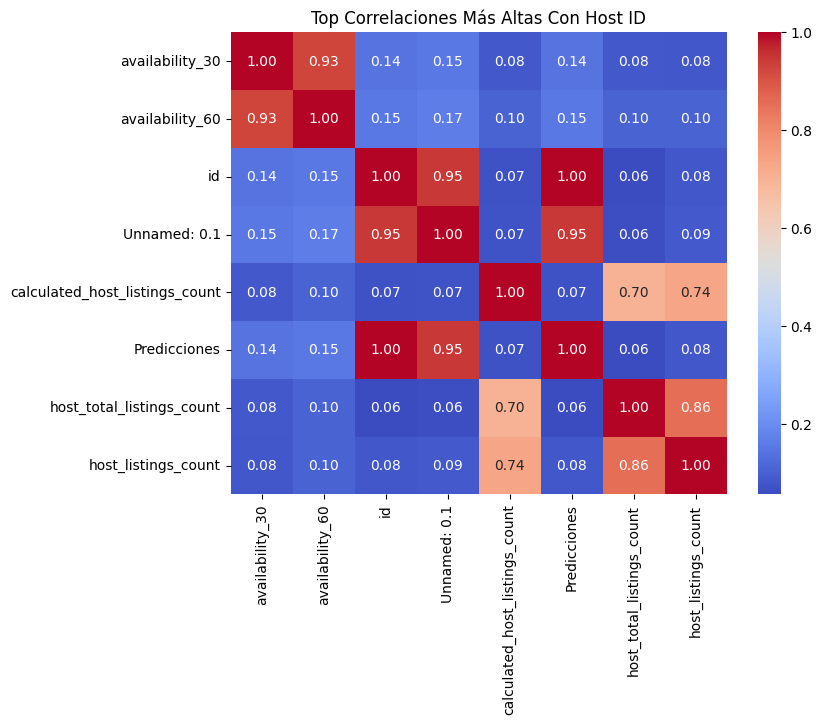

In [1513]:
# Calcular la matriz de correlación
correlation_matrix = df.corr(numeric_only=True)

# Obtener las 6 correlaciones más altas (excluyendo la diagonal)
corr_unstacked = correlation_matrix.where(~np.tril(np.ones(correlation_matrix.shape), k=0).astype(bool))
top_correlations = corr_unstacked.unstack().dropna().abs().sort_values(ascending=False).head(6).index

# Crear un nuevo DataFrame con solo las correlaciones más altas
selected_features = list(set(i[0] for i in top_correlations) | set(i[1] for i in top_correlations))
filtered_corr_matrix = correlation_matrix.loc[selected_features, selected_features]

# Generar el mapa de calor con las correlaciones más altas
plt.figure(figsize=(8, 6))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Top Correlaciones Más Altas Con Host ID")
plt.show()

HOST_ACCEPTANCE_RATE

In [1514]:
#Cargar archivo csv desde seaborn
df= pd.read_csv('Mexico_Entire-Home-Apt_Limpio.csv')
df.head(5)

Predicciones  Unnamed: 0.1  host_response_rate  host_acceptance_rate  \
0  1.302494e+08             0                0.00                  0.00   
1  1.302494e+08             1                1.00                  0.93   
2  1.302494e+08             2                0.71                  0.57   
3  1.302494e+08             3                1.00                  1.00   
4  1.302494e+08             4                1.00                  1.00   

   host_is_superhost  host_identity_verified  room_type  has_availability  \
0                  2                       1          1                 1   
1                  1                       1          1                 1   
2                  1                       1          1                 1   
3                  1                       1          1                 1   
4                  1                       1          1                 1   

   instant_bookable      id  ...  review_scores_accuracy  \
0                 2   35797  ...                    4.79   
1                 2   44616  ...                    4.88   
2                 2   67703  ...                    4.81   
3                 2   70644  ...                    4.90   
4                 2  107078  ...                    5.00   

   review_scores_cleanliness  review_scores_checkin  \
0                       4.76                   4.84   
1                       4.70                   4.87   
2                       4.75                   4.94   
3                       4.96                   4.96   
4                       5.00                   5.00   

   review_scores_communication  review_scores_location  \
0                         4.83                    4.85   
1                         4.78                    4.98   
2                         4.92                    4.98   
3                         4.98                    4.96   
4                         4.92                    4.91   

   calculated_host_listings_count  \
0                             1.0   
1                             8.0   
2                             2.0   
3                             3.0   
4                             3.0   

   calculated_host_listings_count_entire_homes  \
0                                          1.0   
1                                          4.0   
2                                          2.0   
3                                          2.0   
4                                          3.0   

   calculated_host_listings_count_private_rooms  \
0                                           0.0   
1                                           1.0   
2                                           0.0   
3                                           1.0   
4                                           0.0   

   calculated_host_listings_count_shared_rooms  reviews_per_month  
0                                          0.0               1.74  
1                                          0.0               0.41  
2                                          0.0               0.31  
3                                          0.0               0.83  
4                                          0.0               0.11  

[5 rows x 37 columns]

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

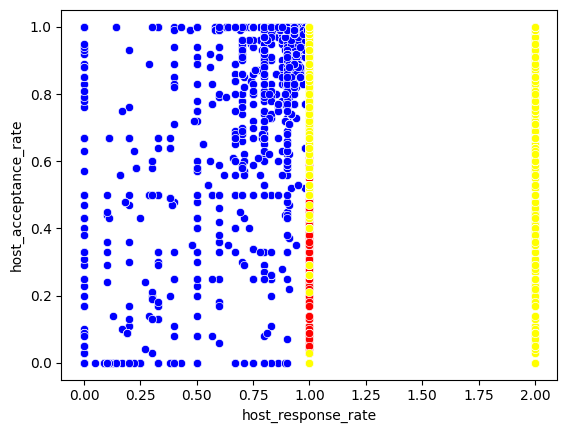

In [1515]:
#Imprimimos el scatter plot entre la variable dependiente "host_acceptance_rate" e independiente "host_acceptance_rate"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='host_response_rate',y='host_acceptance_rate',color='blue',data=df)
sns.scatterplot(x='has_availability',y='host_acceptance_rate',color='red',data=df)
sns.scatterplot(x='host_is_superhost',y='host_acceptance_rate',color='yellow',data=df)

In [1516]:
print(df.isna().sum())  # Verifica NaN por columna

Predicciones                                       0
Unnamed: 0.1                                       0
host_response_rate                              1854
host_acceptance_rate                               0
host_is_superhost                                  0
host_identity_verified                             0
room_type                                          0
has_availability                                   0
instant_bookable                                   0
id                                                 0
host_id                                            0
host_listings_count                                0
host_total_listings_count                          0
accommodates                                       0
bathrooms                                          0
bedrooms                                           0
beds                                               0
price                                              0
minimum_nights                                

In [1517]:
df = df.fillna(0)  # Reemplaza todos los NaN en el DataFrame por 0
print(df.isna().sum().sum())  # Debería imprimir 0 si ya no hay NaN


0


In [1518]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['host_response_rate','has_availability','host_is_superhost']]
Var_Dep = df['host_acceptance_rate']

In [1519]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [1520]:
type(model)

sklearn.linear_model._base.LinearRegression

In [1521]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [1522]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate', 'has_availability', 'host_is_superhost'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 0.65532056, -0.26300425, -0.07407192]),
 'rank_': 3,
 'singular_': array([68.52474753, 40.18391991, 17.92518572]),
 'intercept_': np.float64(0.6680535462340325)}

In [1523]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.6152630455305461

In [1524]:
#Predecimos los valores de total de accidentes a partir de las variables: "host_is_superhost", "host_identity_verified" y "bathrooms"
y_pred= model.predict(X=df[['host_response_rate', 'has_availability', 'host_is_superhost']])
y_pred

array([ 0.25690545,  0.98629793,  0.79625497, ..., -0.0060988 ,
        0.98629793,  0.98629793], shape=(17363,))

In [1525]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones2', y_pred)
df

Predicciones2  Predicciones  Unnamed: 0.1  host_response_rate  \
0           0.256905  1.302494e+08             0                0.00   
1           0.986298  1.302494e+08             1                1.00   
2           0.796255  1.302494e+08             2                0.71   
3           0.986298  1.302494e+08             3                1.00   
4           0.986298  1.302494e+08             4                1.00   
...              ...           ...           ...                 ...   
17358       0.256905  3.158846e+08         26572                0.00   
17359       0.256905  3.158869e+08         26573                0.00   
17360      -0.006099  3.159058e+08         26574                0.00   
17361       0.986298  3.159104e+08         26575                1.00   
17362       0.986298  3.159739e+08         26581                1.00   

       host_acceptance_rate  host_is_superhost  host_identity_verified  \
0                      0.00                  2                       1   
1                      0.93                  1                       1   
2                      0.57                  1                       1   
3                      1.00                  1                       1   
4                      1.00                  1                       1   
...                     ...                ...                     ...   
17358                  0.00                  2                       1   
17359                  0.00                  2                       1   
17360                  0.00                  2                       1   
17361                  1.00                  1                       1   
17362                  1.00                  1                       1   

       room_type  has_availability  instant_bookable  ...  \
0              1                 1                 2  ...   
1              1                 1                 2  ...   
2              1                 1                 2  ...   
3              1                 1                 2  ...   
4              1                 1                 2  ...   
...          ...               ...               ...  ...   
17358          1                 1                 2  ...   
17359          1                 1                 2  ...   
17360          1                 2                 2  ...   
17361          1                 1                 1  ...   
17362          1                 1                 1  ...   

       review_scores_accuracy  review_scores_cleanliness  \
0                        4.79                       4.76   
1                        4.88                       4.70   
2                        4.81                       4.75   
3                        4.90                       4.96   
4                        5.00                       5.00   
...                       ...                        ...   
17358                    4.79                       4.76   
17359                    4.79                       4.76   
17360                    4.79                       4.76   
17361                    4.79                       4.76   
17362                    4.79                       4.76   

       review_scores_checkin  review_scores_communication  \
0                       4.84                         4.83   
1                       4.87                         4.78   
2                       4.94                         4.92   
3                       4.96                         4.98   
4                       5.00                         4.92   
...                      ...                          ...   
17358                   4.84                         4.83   
17359                   4.84                         4.83   
17360                   4.84                         4.83   
17361                   4.84                         4.83   
17362                   4.84                         4.83   

       review_scores_location  calculated_host_listings_count  \
0

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

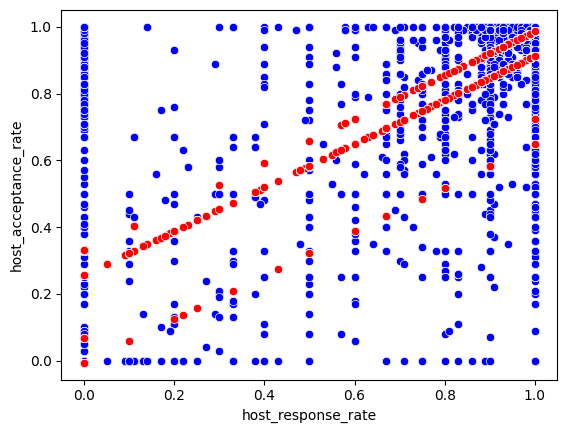

In [1526]:
#Visualizamos la gráfica comparativa entre el total real y el total predechost_response_rateo

sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=df)
sns.scatterplot(x='host_response_rate', y='Predicciones2', color="red", data=df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [1527]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.6152630455305461

In [1528]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.784387050843234)

In [1529]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors = df.corr()
Corr_Factors

Predicciones2  Predicciones  \
Predicciones2                                      1.000000      0.124412   
Predicciones                                       0.124412      1.000000   
Unnamed: 0.1                                       0.119515      0.945858   
host_response_rate                                 0.978713      0.133829   
host_acceptance_rate                               0.784387      0.136854   
host_is_superhost                                 -0.464897     -0.001483   
host_identity_verified                            -0.298649     -0.067601   
room_type                                               NaN           NaN   
has_availability                                  -0.469929     -0.044346   
instant_bookable                                  -0.213297     -0.199933   
id                                                 0.124412      1.000000   
host_id                                            0.008619      0.384885   
host_listings_count                                0.192350      0.078661   
host_total_listings_count                          0.187437      0.055702   
accommodates                                       0.034564     -0.003262   
bathrooms                                          0.079706      0.026285   
bedrooms                                          -0.024146     -0.004203   
beds                                              -0.016782     -0.047475   
price                                              0.228046      0.104098   
minimum_nights                                    -0.040313     -0.148562   
maximum_nights                                     0.004999     -0.271543   
availability_30                                    0.090399      0.142054   
availability_60                                    0.123639      0.152813   
availability_90                                   -0.133982      0.079504   
availability_365                                   0.203618      0.102669   
number_of_reviews                                  0.217117     -0.370670   
number_of_reviews_ltm                              0.323003     -0.090766   
number_of_reviews_l30d                             0.270385      0.071126   
review_scores_accuracy                             0.076532      0.079548   
review_scores_cleanliness                          0.093467      0.095479   
review_scores_checkin                              0.081409      0.056245   
review_scores_communication                        0.101741      0.044378   
review_scores_location                             0.058480      0.066219   
calculated_host_listings_count                     0.222537      0.067831   
calculated_host_listings_count_entire_homes        0.211976      0.035929   
calculated_host_listings_count_private_rooms       0.071914      0.037010   
calculated_host_listings_count_shared_rooms             NaN           NaN   
reviews_per_month                                  0.223388      0.134152   

                                              Unnamed: 0.1  \
Predicciones2                                     0.119515   
Predicciones                                      0.945858   
Unnamed: 0.1                                      1.000000   
host_response_rate                                0.131233   
host_acceptance_rate                              0.137664   
host_is_superhost                                 0.014700   
host_identity_verified                           -0.066643   
room_type                                              NaN   
has_availability                                 -0.042985   
instant_bookable                                 -0.213561   
id                                                0.945858   
host_id                                           0.423006   
host_listings_count                               0.087138   
host_total_listings_count                         0.061407   
accommodates                                     -0.008780   
bathrooms                                         

In [1530]:
#Encontramos el valor absoluto de las todas correlaciones
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

Predicciones2  Predicciones  \
Predicciones2                                      1.000000      0.124412   
Predicciones                                       0.124412      1.000000   
Unnamed: 0.1                                       0.119515      0.945858   
host_response_rate                                 0.978713      0.133829   
host_acceptance_rate                               0.784387      0.136854   
host_is_superhost                                  0.464897      0.001483   
host_identity_verified                             0.298649      0.067601   
room_type                                               NaN           NaN   
has_availability                                   0.469929      0.044346   
instant_bookable                                   0.213297      0.199933   
id                                                 0.124412      1.000000   
host_id                                            0.008619      0.384885   
host_listings_count                                0.192350      0.078661   
host_total_listings_count                          0.187437      0.055702   
accommodates                                       0.034564      0.003262   
bathrooms                                          0.079706      0.026285   
bedrooms                                           0.024146      0.004203   
beds                                               0.016782      0.047475   
price                                              0.228046      0.104098   
minimum_nights                                     0.040313      0.148562   
maximum_nights                                     0.004999      0.271543   
availability_30                                    0.090399      0.142054   
availability_60                                    0.123639      0.152813   
availability_90                                    0.133982      0.079504   
availability_365                                   0.203618      0.102669   
number_of_reviews                                  0.217117      0.370670   
number_of_reviews_ltm                              0.323003      0.090766   
number_of_reviews_l30d                             0.270385      0.071126   
review_scores_accuracy                             0.076532      0.079548   
review_scores_cleanliness                          0.093467      0.095479   
review_scores_checkin                              0.081409      0.056245   
review_scores_communication                        0.101741      0.044378   
review_scores_location                             0.058480      0.066219   
calculated_host_listings_count                     0.222537      0.067831   
calculated_host_listings_count_entire_homes        0.211976      0.035929   
calculated_host_listings_count_private_rooms       0.071914      0.037010   
calculated_host_listings_count_shared_rooms             NaN           NaN   
reviews_per_month                                  0.223388      0.134152   

                                              Unnamed: 0.1  \
Predicciones2                                     0.119515   
Predicciones                                      0.945858   
Unnamed: 0.1                                      1.000000   
host_response_rate                                0.131233   
host_acceptance_rate                              0.137664   
host_is_superhost                                 0.014700   
host_identity_verified                            0.066643   
room_type                                              NaN   
has_availability                                  0.042985   
instant_bookable                                  0.213561   
id                                                0.945858   
host_id                                           0.423006   
host_listings_count                               0.087138   
host_total_listings_count                         0.061407   
accommodates                                      0.008780   
bathrooms                                         

In [1531]:
Corr_Factors1= Corr_Factors1['host_acceptance_rate'].sort_values(ascending=False)
Corr_Factors1

host_acceptance_rate                            1.000000
Predicciones2                                   0.784387
host_response_rate                              0.767690
has_availability                                0.368606
host_is_superhost                               0.364659
number_of_reviews_ltm                           0.319832
instant_bookable                                0.287231
number_of_reviews_l30d                          0.250842
host_identity_verified                          0.232761
reviews_per_month                               0.226536
calculated_host_listings_count                  0.226429
number_of_reviews                               0.217233
calculated_host_listings_count_entire_homes     0.206964
price                                           0.203903
host_listings_count                             0.181284
host_total_listings_count                       0.173908
availability_365                                0.173257
Unnamed: 0.1                   

Host_is_superhost

In [1532]:
#Cargar archivo csv desde seaborn
df= pd.read_csv('Mexico_Entire-Home-Apt_Limpio.csv')
df.head(5)

Predicciones  Unnamed: 0.1  host_response_rate  host_acceptance_rate  \
0  1.302494e+08             0                0.00                  0.00   
1  1.302494e+08             1                1.00                  0.93   
2  1.302494e+08             2                0.71                  0.57   
3  1.302494e+08             3                1.00                  1.00   
4  1.302494e+08             4                1.00                  1.00   

   host_is_superhost  host_identity_verified  room_type  has_availability  \
0                  2                       1          1                 1   
1                  1                       1          1                 1   
2                  1                       1          1                 1   
3                  1                       1          1                 1   
4                  1                       1          1                 1   

   instant_bookable      id  ...  review_scores_accuracy  \
0                 2   35797  ...                    4.79   
1                 2   44616  ...                    4.88   
2                 2   67703  ...                    4.81   
3                 2   70644  ...                    4.90   
4                 2  107078  ...                    5.00   

   review_scores_cleanliness  review_scores_checkin  \
0                       4.76                   4.84   
1                       4.70                   4.87   
2                       4.75                   4.94   
3                       4.96                   4.96   
4                       5.00                   5.00   

   review_scores_communication  review_scores_location  \
0                         4.83                    4.85   
1                         4.78                    4.98   
2                         4.92                    4.98   
3                         4.98                    4.96   
4                         4.92                    4.91   

   calculated_host_listings_count  \
0                             1.0   
1                             8.0   
2                             2.0   
3                             3.0   
4                             3.0   

   calculated_host_listings_count_entire_homes  \
0                                          1.0   
1                                          4.0   
2                                          2.0   
3                                          2.0   
4                                          3.0   

   calculated_host_listings_count_private_rooms  \
0                                           0.0   
1                                           1.0   
2                                           0.0   
3                                           1.0   
4                                           0.0   

   calculated_host_listings_count_shared_rooms  reviews_per_month  
0                                          0.0               1.74  
1                                          0.0               0.41  
2                                          0.0               0.31  
3                                          0.0               0.83  
4                                          0.0               0.11  

[5 rows x 37 columns]

<Axes: xlabel='host_acceptance_rate', ylabel='host_is_superhost'>

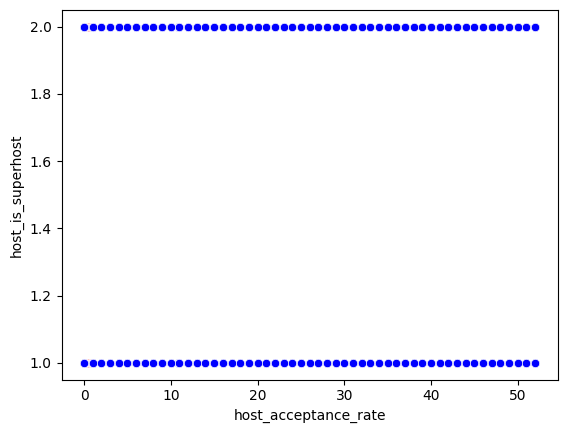

In [1533]:
#Imprimimos el scatter plot entre la variable dependiente "host_is_superhost" e independiente "host_is_superhost"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='host_acceptance_rate',y='host_is_superhost',color='yellow',data=df)
sns.scatterplot(x='host_response_rate',y='host_is_superhost',color='red',data=df)
sns.scatterplot(x='number_of_reviews_ltm',y='host_is_superhost',color='blue',data=df)

In [1534]:
print(df.isna().sum())  # Verifica NaN por columna

Predicciones                                       0
Unnamed: 0.1                                       0
host_response_rate                              1854
host_acceptance_rate                               0
host_is_superhost                                  0
host_identity_verified                             0
room_type                                          0
has_availability                                   0
instant_bookable                                   0
id                                                 0
host_id                                            0
host_listings_count                                0
host_total_listings_count                          0
accommodates                                       0
bathrooms                                          0
bedrooms                                           0
beds                                               0
price                                              0
minimum_nights                                

In [1535]:
df = df.fillna(0)  # Reemplaza todos los NaN en el DataFrame por 0
print(df.isna().sum().sum())  # Debería imprimir 0 si ya no hay NaN


0


In [1536]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['host_acceptance_rate','host_response_rate','number_of_reviews_ltm']]
Var_Dep = df['host_is_superhost']

In [1537]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [1538]:
type(model)

sklearn.linear_model._base.LinearRegression

In [1539]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [1540]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate', 'host_response_rate',
        'number_of_reviews_ltm'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([-0.3188332 , -0.16896585, -0.00873559]),
 'rank_': 3,
 'singular_': array([1796.23777259,   53.90492934,   20.57120227]),
 'intercept_': np.float64(2.039245024958726)}

In [1541]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.19130560604268543

In [1542]:
#Predecimos los valores de total de accidentes a partir de las variables: "host_is_superhost", "host_identity_verified" y "bathrooms"
y_pred= model.predict(X=df[['host_acceptance_rate', 'host_response_rate', 'number_of_reviews_ltm']])
y_pred

array([2.03924502, 1.5737643 , 1.70260199, ..., 2.03924502, 1.55144597,
       1.55144597], shape=(17363,))

In [1543]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones3', y_pred)
df

Predicciones3  Predicciones  Unnamed: 0.1  host_response_rate  \
0           2.039245  1.302494e+08             0                0.00   
1           1.573764  1.302494e+08             1                1.00   
2           1.702602  1.302494e+08             2                0.71   
3           1.490297  1.302494e+08             3                1.00   
4           1.551446  1.302494e+08             4                1.00   
...              ...           ...           ...                 ...   
17358       2.039245  3.158846e+08         26572                0.00   
17359       2.039245  3.158869e+08         26573                0.00   
17360       2.039245  3.159058e+08         26574                0.00   
17361       1.551446  3.159104e+08         26575                1.00   
17362       1.551446  3.159739e+08         26581                1.00   

       host_acceptance_rate  host_is_superhost  host_identity_verified  \
0                      0.00                  2                       1   
1                      0.93                  1                       1   
2                      0.57                  1                       1   
3                      1.00                  1                       1   
4                      1.00                  1                       1   
...                     ...                ...                     ...   
17358                  0.00                  2                       1   
17359                  0.00                  2                       1   
17360                  0.00                  2                       1   
17361                  1.00                  1                       1   
17362                  1.00                  1                       1   

       room_type  has_availability  instant_bookable  ...  \
0              1                 1                 2  ...   
1              1                 1                 2  ...   
2              1                 1                 2  ...   
3              1                 1                 2  ...   
4              1                 1                 2  ...   
...          ...               ...               ...  ...   
17358          1                 1                 2  ...   
17359          1                 1                 2  ...   
17360          1                 2                 2  ...   
17361          1                 1                 1  ...   
17362          1                 1                 1  ...   

       review_scores_accuracy  review_scores_cleanliness  \
0                        4.79                       4.76   
1                        4.88                       4.70   
2                        4.81                       4.75   
3                        4.90                       4.96   
4                        5.00                       5.00   
...                       ...                        ...   
17358                    4.79                       4.76   
17359                    4.79                       4.76   
17360                    4.79                       4.76   
17361                    4.79                       4.76   
17362                    4.79                       4.76   

       review_scores_checkin  review_scores_communication  \
0                       4.84                         4.83   
1                       4.87                         4.78   
2                       4.94                         4.92   
3                       4.96                         4.98   
4                       5.00                         4.92   
...                      ...                          ...   
17358                   4.84                         4.83   
17359                   4.84                         4.83   
17360                   4.84                         4.83   
17361                   4.84                         4.83   
17362                   4.84                         4.83   

       review_scores_location  calculated_host_listings_count  \
0

<Axes: xlabel='host_acceptance_rate', ylabel='host_is_superhost'>

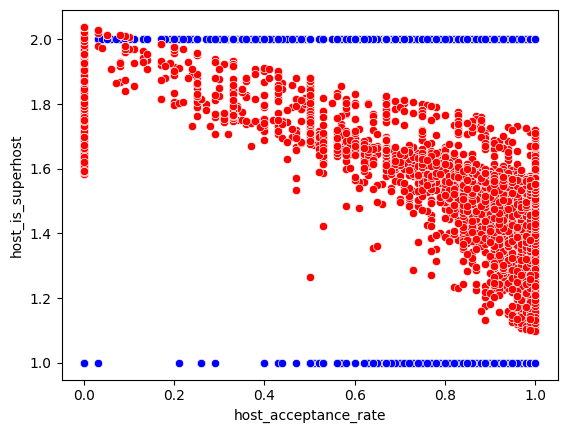

In [1544]:
#Visualizamos la gráfica comparativa entre el total real y el total predechost_acceptance_rateo

sns.scatterplot(x='host_acceptance_rate', y='host_is_superhost', color="blue", data=df)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones3', color="red", data=df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [1545]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.19130560604268543

In [1546]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.43738496321054)

In [1547]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors = df.corr()
Corr_Factors

Predicciones3  Predicciones  \
Predicciones3                                      1.000000     -0.048225   
Predicciones                                      -0.048225      1.000000   
Unnamed: 0.1                                      -0.036495      0.945858   
host_response_rate                                -0.768012      0.133829   
host_acceptance_rate                              -0.833725      0.136854   
host_is_superhost                                  0.437385     -0.001483   
host_identity_verified                             0.204654     -0.067601   
room_type                                               NaN           NaN   
has_availability                                   0.333291     -0.044346   
instant_bookable                                   0.241905     -0.199933   
id                                                -0.048225      1.000000   
host_id                                           -0.010966      0.384885   
host_listings_count                               -0.164747      0.078661   
host_total_listings_count                         -0.169379      0.055702   
accommodates                                      -0.058454     -0.003262   
bathrooms                                         -0.067021      0.026285   
bedrooms                                           0.021922     -0.004203   
beds                                               0.003730     -0.047475   
price                                             -0.192998      0.104098   
minimum_nights                                     0.046278     -0.148562   
maximum_nights                                    -0.026740     -0.271543   
availability_30                                   -0.054858      0.142054   
availability_60                                   -0.083343      0.152813   
availability_90                                    0.179702      0.079504   
availability_365                                  -0.159609      0.102669   
number_of_reviews                                 -0.436502     -0.370670   
number_of_reviews_ltm                             -0.766119     -0.090766   
number_of_reviews_l30d                            -0.462997      0.071126   
review_scores_accuracy                            -0.014311      0.079548   
review_scores_cleanliness                         -0.033586      0.095479   
review_scores_checkin                             -0.002816      0.056245   
review_scores_communication                       -0.042680      0.044378   
review_scores_location                            -0.009095      0.066219   
calculated_host_listings_count                    -0.199677      0.067831   
calculated_host_listings_count_entire_homes       -0.196463      0.035929   
calculated_host_listings_count_private_rooms      -0.027664      0.037010   
calculated_host_listings_count_shared_rooms             NaN           NaN   
reviews_per_month                                 -0.527535      0.134152   

                                              Unnamed: 0.1  \
Predicciones3                                    -0.036495   
Predicciones                                      0.945858   
Unnamed: 0.1                                      1.000000   
host_response_rate                                0.131233   
host_acceptance_rate                              0.137664   
host_is_superhost                                 0.014700   
host_identity_verified                           -0.066643   
room_type                                              NaN   
has_availability                                 -0.042985   
instant_bookable                                 -0.213561   
id                                                0.945858   
host_id                                           0.423006   
host_listings_count                               0.087138   
host_total_listings_count                         0.061407   
accommodates                                     -0.008780   
bathrooms                                         

In [1548]:
#Encontramos el valor absoluto de las todas correlaciones
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

Predicciones3  Predicciones  \
Predicciones3                                      1.000000      0.048225   
Predicciones                                       0.048225      1.000000   
Unnamed: 0.1                                       0.036495      0.945858   
host_response_rate                                 0.768012      0.133829   
host_acceptance_rate                               0.833725      0.136854   
host_is_superhost                                  0.437385      0.001483   
host_identity_verified                             0.204654      0.067601   
room_type                                               NaN           NaN   
has_availability                                   0.333291      0.044346   
instant_bookable                                   0.241905      0.199933   
id                                                 0.048225      1.000000   
host_id                                            0.010966      0.384885   
host_listings_count                                0.164747      0.078661   
host_total_listings_count                          0.169379      0.055702   
accommodates                                       0.058454      0.003262   
bathrooms                                          0.067021      0.026285   
bedrooms                                           0.021922      0.004203   
beds                                               0.003730      0.047475   
price                                              0.192998      0.104098   
minimum_nights                                     0.046278      0.148562   
maximum_nights                                     0.026740      0.271543   
availability_30                                    0.054858      0.142054   
availability_60                                    0.083343      0.152813   
availability_90                                    0.179702      0.079504   
availability_365                                   0.159609      0.102669   
number_of_reviews                                  0.436502      0.370670   
number_of_reviews_ltm                              0.766119      0.090766   
number_of_reviews_l30d                             0.462997      0.071126   
review_scores_accuracy                             0.014311      0.079548   
review_scores_cleanliness                          0.033586      0.095479   
review_scores_checkin                              0.002816      0.056245   
review_scores_communication                        0.042680      0.044378   
review_scores_location                             0.009095      0.066219   
calculated_host_listings_count                     0.199677      0.067831   
calculated_host_listings_count_entire_homes        0.196463      0.035929   
calculated_host_listings_count_private_rooms       0.027664      0.037010   
calculated_host_listings_count_shared_rooms             NaN           NaN   
reviews_per_month                                  0.527535      0.134152   

                                              Unnamed: 0.1  \
Predicciones3                                     0.036495   
Predicciones                                      0.945858   
Unnamed: 0.1                                      1.000000   
host_response_rate                                0.131233   
host_acceptance_rate                              0.137664   
host_is_superhost                                 0.014700   
host_identity_verified                            0.066643   
room_type                                              NaN   
has_availability                                  0.042985   
instant_bookable                                  0.213561   
id                                                0.945858   
host_id                                           0.423006   
host_listings_count                               0.087138   
host_total_listings_count                         0.061407   
accommodates                                      0.008780   
bathrooms                                         

In [1549]:
Corr_Factors1= Corr_Factors1['host_is_superhost'].sort_values(ascending=False)
Corr_Factors1

host_is_superhost                               1.000000
Predicciones3                                   0.437385
host_acceptance_rate                            0.364659
host_response_rate                              0.335917
number_of_reviews_ltm                           0.335089
number_of_reviews                               0.241113
number_of_reviews_l30d                          0.232823
reviews_per_month                               0.226653
availability_90                                 0.148841
review_scores_communication                     0.144010
review_scores_accuracy                          0.142145
has_availability                                0.138732
review_scores_cleanliness                       0.137384
price                                           0.124232
review_scores_checkin                           0.106078
calculated_host_listings_count_entire_homes     0.097919
host_identity_verified                          0.095419
host_total_listings_count      

Host_total_listings_count

In [1550]:
#Cargar archivo csv desde seaborn
df= pd.read_csv('Mexico_Entire-Home-Apt_Limpio.csv')
df.head(5)

Predicciones  Unnamed: 0.1  host_response_rate  host_acceptance_rate  \
0  1.302494e+08             0                0.00                  0.00   
1  1.302494e+08             1                1.00                  0.93   
2  1.302494e+08             2                0.71                  0.57   
3  1.302494e+08             3                1.00                  1.00   
4  1.302494e+08             4                1.00                  1.00   

   host_is_superhost  host_identity_verified  room_type  has_availability  \
0                  2                       1          1                 1   
1                  1                       1          1                 1   
2                  1                       1          1                 1   
3                  1                       1          1                 1   
4                  1                       1          1                 1   

   instant_bookable      id  ...  review_scores_accuracy  \
0                 2   35797  ...                    4.79   
1                 2   44616  ...                    4.88   
2                 2   67703  ...                    4.81   
3                 2   70644  ...                    4.90   
4                 2  107078  ...                    5.00   

   review_scores_cleanliness  review_scores_checkin  \
0                       4.76                   4.84   
1                       4.70                   4.87   
2                       4.75                   4.94   
3                       4.96                   4.96   
4                       5.00                   5.00   

   review_scores_communication  review_scores_location  \
0                         4.83                    4.85   
1                         4.78                    4.98   
2                         4.92                    4.98   
3                         4.98                    4.96   
4                         4.92                    4.91   

   calculated_host_listings_count  \
0                             1.0   
1                             8.0   
2                             2.0   
3                             3.0   
4                             3.0   

   calculated_host_listings_count_entire_homes  \
0                                          1.0   
1                                          4.0   
2                                          2.0   
3                                          2.0   
4                                          3.0   

   calculated_host_listings_count_private_rooms  \
0                                           0.0   
1                                           1.0   
2                                           0.0   
3                                           1.0   
4                                           0.0   

   calculated_host_listings_count_shared_rooms  reviews_per_month  
0                                          0.0               1.74  
1                                          0.0               0.41  
2                                          0.0               0.31  
3                                          0.0               0.83  
4                                          0.0               0.11  

[5 rows x 37 columns]

<Axes: xlabel='host_listings_count', ylabel='host_total_listings_count'>

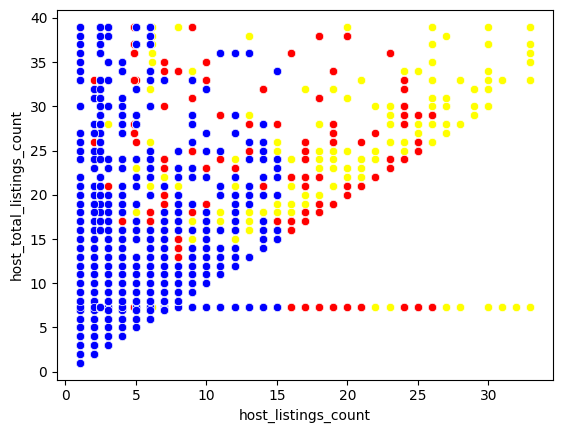

In [1551]:
#Imprimimos el scatter plot entre la variable dependiente "host_total_listings_count" e independiente "host_total_listings_count"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='host_listings_count',y='host_total_listings_count',color='yellow',data=df)
sns.scatterplot(x='calculated_host_listings_count',y='host_total_listings_count',color='red',data=df)
sns.scatterplot(x='calculated_host_listings_count_entire_homes',y='host_total_listings_count',color='blue',data=df)

In [1552]:
print(df.isna().sum())  # Verifica NaN por columna

Predicciones                                       0
Unnamed: 0.1                                       0
host_response_rate                              1854
host_acceptance_rate                               0
host_is_superhost                                  0
host_identity_verified                             0
room_type                                          0
has_availability                                   0
instant_bookable                                   0
id                                                 0
host_id                                            0
host_listings_count                                0
host_total_listings_count                          0
accommodates                                       0
bathrooms                                          0
bedrooms                                           0
beds                                               0
price                                              0
minimum_nights                                

In [1553]:
df = df.fillna(0)  # Reemplaza todos los NaN en el DataFrame por 0
print(df.isna().sum().sum())  # Debería imprimir 0 si ya no hay NaN


0


In [1554]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['host_listings_count','calculated_host_listings_count','calculated_host_listings_count_entire_homes']]
Var_Dep = df['host_total_listings_count']

In [1555]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [1556]:
type(model)

sklearn.linear_model._base.LinearRegression

In [1557]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [1558]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_listings_count', 'calculated_host_listings_count',
        'calculated_host_listings_count_entire_homes'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 0.85055788,  0.24363714, -0.01143801]),
 'rank_': 3,
 'singular_': array([1098.33405527,  413.72299591,  321.51193718]),
 'intercept_': np.float64(0.9687440469772115)}

In [1559]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.7427456749961611

In [1560]:
#Predecimos los valores de total de accidentes a partir de las variables: "host_is_superhost", "host_identity_verified" y "bathrooms"
y_pred= model.predict(X=df[['host_listings_count', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes']])
y_pred

array([ 2.05150106, 13.07878366,  3.98481595, ...,  2.05150106,
       25.32700157,  5.29977208], shape=(17363,))

In [1561]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones4', y_pred)
df

Predicciones4  Predicciones  Unnamed: 0.1  host_response_rate  \
0           2.051501  1.302494e+08             0                0.00   
1          13.078784  1.302494e+08             1                1.00   
2           3.984816  1.302494e+08             2                0.71   
3           4.228453  1.302494e+08             3                1.00   
4           5.918131  1.302494e+08             4                1.00   
...              ...           ...           ...                 ...   
17358       2.051501  3.158846e+08         26572                0.00   
17359       2.051501  3.158869e+08         26573                0.00   
17360       2.051501  3.159058e+08         26574                0.00   
17361      25.327002  3.159104e+08         26575                1.00   
17362       5.299772  3.159739e+08         26581                1.00   

       host_acceptance_rate  host_is_superhost  host_identity_verified  \
0                      0.00                  2                       1   
1                      0.93                  1                       1   
2                      0.57                  1                       1   
3                      1.00                  1                       1   
4                      1.00                  1                       1   
...                     ...                ...                     ...   
17358                  0.00                  2                       1   
17359                  0.00                  2                       1   
17360                  0.00                  2                       1   
17361                  1.00                  1                       1   
17362                  1.00                  1                       1   

       room_type  has_availability  instant_bookable  ...  \
0              1                 1                 2  ...   
1              1                 1                 2  ...   
2              1                 1                 2  ...   
3              1                 1                 2  ...   
4              1                 1                 2  ...   
...          ...               ...               ...  ...   
17358          1                 1                 2  ...   
17359          1                 1                 2  ...   
17360          1                 2                 2  ...   
17361          1                 1                 1  ...   
17362          1                 1                 1  ...   

       review_scores_accuracy  review_scores_cleanliness  \
0                        4.79                       4.76   
1                        4.88                       4.70   
2                        4.81                       4.75   
3                        4.90                       4.96   
4                        5.00                       5.00   
...                       ...                        ...   
17358                    4.79                       4.76   
17359                    4.79                       4.76   
17360                    4.79                       4.76   
17361                    4.79                       4.76   
17362                    4.79                       4.76   

       review_scores_checkin  review_scores_communication  \
0                       4.84                         4.83   
1                       4.87                         4.78   
2                       4.94                         4.92   
3                       4.96                         4.98   
4                       5.00                         4.92   
...                      ...                          ...   
17358                   4.84                         4.83   
17359                   4.84                         4.83   
17360                   4.84                         4.83   
17361                   4.84                         4.83   
17362                   4.84                         4.83   

       review_scores_location  calculated_host_listings_count  \
0

<Axes: xlabel='host_listings_count', ylabel='host_total_listings_count'>

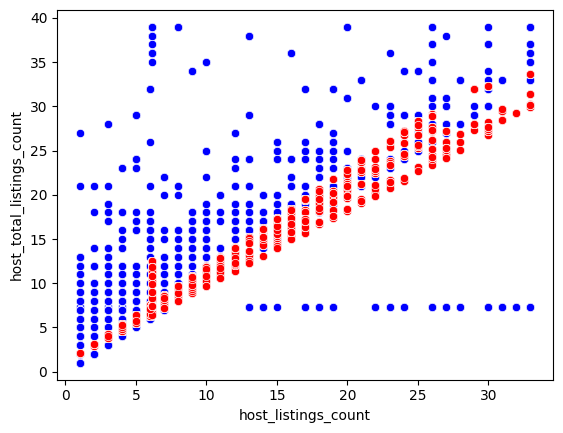

In [1562]:
#Visualizamos la gráfica comparativa entre el total real y el total predechost_listings_count

sns.scatterplot(x='host_listings_count', y='host_total_listings_count', color="blue", data=df)
sns.scatterplot(x='host_listings_count', y='Predicciones4', color="red", data=df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [1563]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.7427456749961611

In [1564]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.8618269402821898)

In [1565]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors = df.corr()
Corr_Factors

Predicciones4  Predicciones  \
Predicciones4                                      1.000000      0.079937   
Predicciones                                       0.079937      1.000000   
Unnamed: 0.1                                       0.087951      0.945858   
host_response_rate                                 0.207627      0.133829   
host_acceptance_rate                               0.196690      0.136854   
host_is_superhost                                 -0.068583     -0.001483   
host_identity_verified                            -0.048922     -0.067601   
room_type                                               NaN           NaN   
has_availability                                  -0.085114     -0.044346   
instant_bookable                                  -0.240819     -0.199933   
id                                                 0.079937      1.000000   
host_id                                            0.047314      0.384885   
host_listings_count                                0.992101      0.078661   
host_total_listings_count                          0.861827      0.055702   
accommodates                                      -0.061611     -0.003262   
bathrooms                                         -0.020883      0.026285   
bedrooms                                          -0.088417     -0.004203   
beds                                              -0.102603     -0.047475   
price                                              0.096036      0.104098   
minimum_nights                                    -0.174014     -0.148562   
maximum_nights                                     0.000143     -0.271543   
availability_30                                    0.083834      0.142054   
availability_60                                    0.108448      0.152813   
availability_90                                    0.047528      0.079504   
availability_365                                   0.116123      0.102669   
number_of_reviews                                  0.020814     -0.370670   
number_of_reviews_ltm                              0.061097     -0.090766   
number_of_reviews_l30d                             0.016477      0.071126   
review_scores_accuracy                            -0.089113      0.079548   
review_scores_cleanliness                         -0.036628      0.095479   
review_scores_checkin                             -0.051583      0.056245   
review_scores_communication                       -0.067974      0.044378   
review_scores_location                             0.001478      0.066219   
calculated_host_listings_count                     0.815098      0.067831   
calculated_host_listings_count_entire_homes        0.560706      0.035929   
calculated_host_listings_count_private_rooms       0.205788      0.037010   
calculated_host_listings_count_shared_rooms             NaN           NaN   
reviews_per_month                                  0.057657      0.134152   

                                              Unnamed: 0.1  \
Predicciones4                                     0.087951   
Predicciones                                      0.945858   
Unnamed: 0.1                                      1.000000   
host_response_rate                                0.131233   
host_acceptance_rate                              0.137664   
host_is_superhost                                 0.014700   
host_identity_verified                           -0.066643   
room_type                                              NaN   
has_availability                                 -0.042985   
instant_bookable                                 -0.213561   
id                                                0.945858   
host_id                                           0.423006   
host_listings_count                               0.087138   
host_total_listings_count                         0.061407   
accommodates                                     -0.008780   
bathrooms                                         

In [1566]:
#Encontramos el valor absoluto de las todas correlaciones
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

Predicciones4  Predicciones  \
Predicciones4                                      1.000000      0.079937   
Predicciones                                       0.079937      1.000000   
Unnamed: 0.1                                       0.087951      0.945858   
host_response_rate                                 0.207627      0.133829   
host_acceptance_rate                               0.196690      0.136854   
host_is_superhost                                  0.068583      0.001483   
host_identity_verified                             0.048922      0.067601   
room_type                                               NaN           NaN   
has_availability                                   0.085114      0.044346   
instant_bookable                                   0.240819      0.199933   
id                                                 0.079937      1.000000   
host_id                                            0.047314      0.384885   
host_listings_count                                0.992101      0.078661   
host_total_listings_count                          0.861827      0.055702   
accommodates                                       0.061611      0.003262   
bathrooms                                          0.020883      0.026285   
bedrooms                                           0.088417      0.004203   
beds                                               0.102603      0.047475   
price                                              0.096036      0.104098   
minimum_nights                                     0.174014      0.148562   
maximum_nights                                     0.000143      0.271543   
availability_30                                    0.083834      0.142054   
availability_60                                    0.108448      0.152813   
availability_90                                    0.047528      0.079504   
availability_365                                   0.116123      0.102669   
number_of_reviews                                  0.020814      0.370670   
number_of_reviews_ltm                              0.061097      0.090766   
number_of_reviews_l30d                             0.016477      0.071126   
review_scores_accuracy                             0.089113      0.079548   
review_scores_cleanliness                          0.036628      0.095479   
review_scores_checkin                              0.051583      0.056245   
review_scores_communication                        0.067974      0.044378   
review_scores_location                             0.001478      0.066219   
calculated_host_listings_count                     0.815098      0.067831   
calculated_host_listings_count_entire_homes        0.560706      0.035929   
calculated_host_listings_count_private_rooms       0.205788      0.037010   
calculated_host_listings_count_shared_rooms             NaN           NaN   
reviews_per_month                                  0.057657      0.134152   

                                              Unnamed: 0.1  \
Predicciones4                                     0.087951   
Predicciones                                      0.945858   
Unnamed: 0.1                                      1.000000   
host_response_rate                                0.131233   
host_acceptance_rate                              0.137664   
host_is_superhost                                 0.014700   
host_identity_verified                            0.066643   
room_type                                              NaN   
has_availability                                  0.042985   
instant_bookable                                  0.213561   
id                                                0.945858   
host_id                                           0.423006   
host_listings_count                               0.087138   
host_total_listings_count                         0.061407   
accommodates                                      0.008780   
bathrooms                                         

In [1567]:
Corr_Factors1= Corr_Factors1['host_total_listings_count'].sort_values(ascending=False)
Corr_Factors1

host_total_listings_count                       1.000000
Predicciones4                                   0.861827
host_listings_count                             0.855019
calculated_host_listings_count                  0.702473
calculated_host_listings_count_entire_homes     0.483232
instant_bookable                                0.217924
calculated_host_listings_count_private_rooms    0.198638
host_response_rate                              0.185587
host_acceptance_rate                            0.173908
minimum_nights                                  0.146821
availability_60                                 0.103729
review_scores_accuracy                          0.090610
availability_365                                0.086639
price                                           0.085391
has_availability                                0.084274
beds                                            0.083870
availability_30                                 0.081568
host_is_superhost              

Room_Type

In [1568]:
#Cargar archivo csv desde seaborn
df= pd.read_csv('Mexico_Entire-Home-Apt_Limpio.csv')
df.head(5)

Predicciones  Unnamed: 0.1  host_response_rate  host_acceptance_rate  \
0  1.302494e+08             0                0.00                  0.00   
1  1.302494e+08             1                1.00                  0.93   
2  1.302494e+08             2                0.71                  0.57   
3  1.302494e+08             3                1.00                  1.00   
4  1.302494e+08             4                1.00                  1.00   

   host_is_superhost  host_identity_verified  room_type  has_availability  \
0                  2                       1          1                 1   
1                  1                       1          1                 1   
2                  1                       1          1                 1   
3                  1                       1          1                 1   
4                  1                       1          1                 1   

   instant_bookable      id  ...  review_scores_accuracy  \
0                 2   35797  ...                    4.79   
1                 2   44616  ...                    4.88   
2                 2   67703  ...                    4.81   
3                 2   70644  ...                    4.90   
4                 2  107078  ...                    5.00   

   review_scores_cleanliness  review_scores_checkin  \
0                       4.76                   4.84   
1                       4.70                   4.87   
2                       4.75                   4.94   
3                       4.96                   4.96   
4                       5.00                   5.00   

   review_scores_communication  review_scores_location  \
0                         4.83                    4.85   
1                         4.78                    4.98   
2                         4.92                    4.98   
3                         4.98                    4.96   
4                         4.92                    4.91   

   calculated_host_listings_count  \
0                             1.0   
1                             8.0   
2                             2.0   
3                             3.0   
4                             3.0   

   calculated_host_listings_count_entire_homes  \
0                                          1.0   
1                                          4.0   
2                                          2.0   
3                                          2.0   
4                                          3.0   

   calculated_host_listings_count_private_rooms  \
0                                           0.0   
1                                           1.0   
2                                           0.0   
3                                           1.0   
4                                           0.0   

   calculated_host_listings_count_shared_rooms  reviews_per_month  
0                                          0.0               1.74  
1                                          0.0               0.41  
2                                          0.0               0.31  
3                                          0.0               0.83  
4                                          0.0               0.11  

[5 rows x 37 columns]

<Axes: xlabel='host_listings_count', ylabel='room_type'>

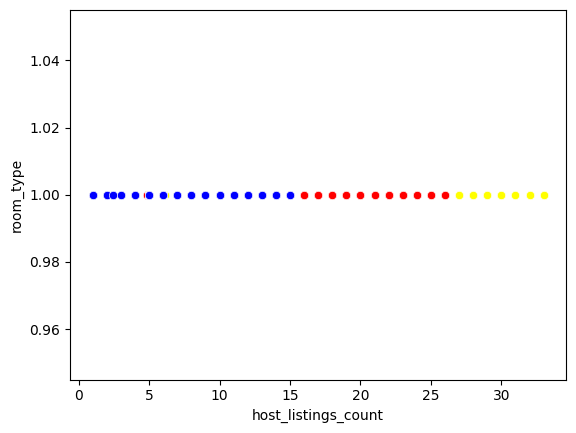

In [1569]:
#Imprimimos el scatter plot entre la variable dependiente "room_type" e independiente "room_type"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='host_listings_count',y='room_type',color='yellow',data=df)
sns.scatterplot(x='calculated_host_listings_count',y='room_type',color='red',data=df)
sns.scatterplot(x='calculated_host_listings_count_entire_homes',y='room_type',color='blue',data=df)

In [1570]:
print(df.isna().sum())  # Verifica NaN por columna

Predicciones                                       0
Unnamed: 0.1                                       0
host_response_rate                              1854
host_acceptance_rate                               0
host_is_superhost                                  0
host_identity_verified                             0
room_type                                          0
has_availability                                   0
instant_bookable                                   0
id                                                 0
host_id                                            0
host_listings_count                                0
host_total_listings_count                          0
accommodates                                       0
bathrooms                                          0
bedrooms                                           0
beds                                               0
price                                              0
minimum_nights                                

In [1571]:
df = df.fillna(0)  # Reemplaza todos los NaN en el DataFrame por 0
print(df.isna().sum().sum())  # Debería imprimir 0 si ya no hay NaN


0


In [1572]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['host_listings_count','calculated_host_listings_count','calculated_host_listings_count_entire_homes']]
Var_Dep = df['room_type']

In [1573]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [1574]:
type(model)

sklearn.linear_model._base.LinearRegression

In [1575]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [1576]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_listings_count', 'calculated_host_listings_count',
        'calculated_host_listings_count_entire_homes'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0., 0., 0.]),
 'rank_': 3,
 'singular_': array([1098.33405527,  413.72299591,  321.51193718]),
 'intercept_': np.float64(1.0)}

In [1577]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

1.0

In [1578]:
#Predecimos los valores de total de accidentes a partir de las variables: "host_is_superhost", "host_identity_verified" y "bathrooms"
y_pred= model.predict(X=df[['host_listings_count', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes']])
y_pred

array([1., 1., 1., ..., 1., 1., 1.], shape=(17363,))

In [1579]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones5', y_pred)
df

Predicciones5  Predicciones  Unnamed: 0.1  host_response_rate  \
0                1.0  1.302494e+08             0                0.00   
1                1.0  1.302494e+08             1                1.00   
2                1.0  1.302494e+08             2                0.71   
3                1.0  1.302494e+08             3                1.00   
4                1.0  1.302494e+08             4                1.00   
...              ...           ...           ...                 ...   
17358            1.0  3.158846e+08         26572                0.00   
17359            1.0  3.158869e+08         26573                0.00   
17360            1.0  3.159058e+08         26574                0.00   
17361            1.0  3.159104e+08         26575                1.00   
17362            1.0  3.159739e+08         26581                1.00   

       host_acceptance_rate  host_is_superhost  host_identity_verified  \
0                      0.00                  2                       1   
1                      0.93                  1                       1   
2                      0.57                  1                       1   
3                      1.00                  1                       1   
4                      1.00                  1                       1   
...                     ...                ...                     ...   
17358                  0.00                  2                       1   
17359                  0.00                  2                       1   
17360                  0.00                  2                       1   
17361                  1.00                  1                       1   
17362                  1.00                  1                       1   

       room_type  has_availability  instant_bookable  ...  \
0              1                 1                 2  ...   
1              1                 1                 2  ...   
2              1                 1                 2  ...   
3              1                 1                 2  ...   
4              1                 1                 2  ...   
...          ...               ...               ...  ...   
17358          1                 1                 2  ...   
17359          1                 1                 2  ...   
17360          1                 2                 2  ...   
17361          1                 1                 1  ...   
17362          1                 1                 1  ...   

       review_scores_accuracy  review_scores_cleanliness  \
0                        4.79                       4.76   
1                        4.88                       4.70   
2                        4.81                       4.75   
3                        4.90                       4.96   
4                        5.00                       5.00   
...                       ...                        ...   
17358                    4.79                       4.76   
17359                    4.79                       4.76   
17360                    4.79                       4.76   
17361                    4.79                       4.76   
17362                    4.79                       4.76   

       review_scores_checkin  review_scores_communication  \
0                       4.84                         4.83   
1                       4.87                         4.78   
2                       4.94                         4.92   
3                       4.96                         4.98   
4                       5.00                         4.92   
...                      ...                          ...   
17358                   4.84                         4.83   
17359                   4.84                         4.83   
17360                   4.84                         4.83   
17361                   4.84                         4.83   
17362                   4.84                         4.83   

       review_scores_location  calculated_host_listings_count  \
0

<Axes: xlabel='host_listings_count', ylabel='room_type'>

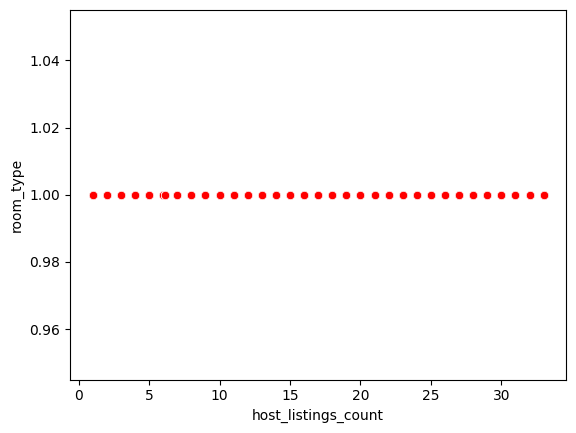

In [1580]:
#Visualizamos la gráfica comparativa entre el total real y el total predechost_listings_count

sns.scatterplot(x='host_listings_count', y='room_type', color="blue", data=df)
sns.scatterplot(x='host_listings_count', y='Predicciones5', color="red", data=df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [1581]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

1.0

In [1582]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(1.0)

In [1583]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors = df.corr()
Corr_Factors

Predicciones5  Predicciones  \
Predicciones5                                           NaN           NaN   
Predicciones                                            NaN      1.000000   
Unnamed: 0.1                                            NaN      0.945858   
host_response_rate                                      NaN      0.133829   
host_acceptance_rate                                    NaN      0.136854   
host_is_superhost                                       NaN     -0.001483   
host_identity_verified                                  NaN     -0.067601   
room_type                                               NaN           NaN   
has_availability                                        NaN     -0.044346   
instant_bookable                                        NaN     -0.199933   
id                                                      NaN      1.000000   
host_id                                                 NaN      0.384885   
host_listings_count                                     NaN      0.078661   
host_total_listings_count                               NaN      0.055702   
accommodates                                            NaN     -0.003262   
bathrooms                                               NaN      0.026285   
bedrooms                                                NaN     -0.004203   
beds                                                    NaN     -0.047475   
price                                                   NaN      0.104098   
minimum_nights                                          NaN     -0.148562   
maximum_nights                                          NaN     -0.271543   
availability_30                                         NaN      0.142054   
availability_60                                         NaN      0.152813   
availability_90                                         NaN      0.079504   
availability_365                                        NaN      0.102669   
number_of_reviews                                       NaN     -0.370670   
number_of_reviews_ltm                                   NaN     -0.090766   
number_of_reviews_l30d                                  NaN      0.071126   
review_scores_accuracy                                  NaN      0.079548   
review_scores_cleanliness                               NaN      0.095479   
review_scores_checkin                                   NaN      0.056245   
review_scores_communication                             NaN      0.044378   
review_scores_location                                  NaN      0.066219   
calculated_host_listings_count                          NaN      0.067831   
calculated_host_listings_count_entire_homes             NaN      0.035929   
calculated_host_listings_count_private_rooms            NaN      0.037010   
calculated_host_listings_count_shared_rooms             NaN           NaN   
reviews_per_month                                       NaN      0.134152   

                                              Unnamed: 0.1  \
Predicciones5                                          NaN   
Predicciones                                      0.945858   
Unnamed: 0.1                                      1.000000   
host_response_rate                                0.131233   
host_acceptance_rate                              0.137664   
host_is_superhost                                 0.014700   
host_identity_verified                           -0.066643   
room_type                                              NaN   
has_availability                                 -0.042985   
instant_bookable                                 -0.213561   
id                                                0.945858   
host_id                                           0.423006   
host_listings_count                               0.087138   
host_total_listings_count                         0.061407   
accommodates                                     -0.008780   
bathrooms                                         

In [1584]:
#Encontramos el valor absoluto de las todas correlaciones
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

Predicciones5  Predicciones  \
Predicciones5                                           NaN           NaN   
Predicciones                                            NaN      1.000000   
Unnamed: 0.1                                            NaN      0.945858   
host_response_rate                                      NaN      0.133829   
host_acceptance_rate                                    NaN      0.136854   
host_is_superhost                                       NaN      0.001483   
host_identity_verified                                  NaN      0.067601   
room_type                                               NaN           NaN   
has_availability                                        NaN      0.044346   
instant_bookable                                        NaN      0.199933   
id                                                      NaN      1.000000   
host_id                                                 NaN      0.384885   
host_listings_count                                     NaN      0.078661   
host_total_listings_count                               NaN      0.055702   
accommodates                                            NaN      0.003262   
bathrooms                                               NaN      0.026285   
bedrooms                                                NaN      0.004203   
beds                                                    NaN      0.047475   
price                                                   NaN      0.104098   
minimum_nights                                          NaN      0.148562   
maximum_nights                                          NaN      0.271543   
availability_30                                         NaN      0.142054   
availability_60                                         NaN      0.152813   
availability_90                                         NaN      0.079504   
availability_365                                        NaN      0.102669   
number_of_reviews                                       NaN      0.370670   
number_of_reviews_ltm                                   NaN      0.090766   
number_of_reviews_l30d                                  NaN      0.071126   
review_scores_accuracy                                  NaN      0.079548   
review_scores_cleanliness                               NaN      0.095479   
review_scores_checkin                                   NaN      0.056245   
review_scores_communication                             NaN      0.044378   
review_scores_location                                  NaN      0.066219   
calculated_host_listings_count                          NaN      0.067831   
calculated_host_listings_count_entire_homes             NaN      0.035929   
calculated_host_listings_count_private_rooms            NaN      0.037010   
calculated_host_listings_count_shared_rooms             NaN           NaN   
reviews_per_month                                       NaN      0.134152   

                                              Unnamed: 0.1  \
Predicciones5                                          NaN   
Predicciones                                      0.945858   
Unnamed: 0.1                                      1.000000   
host_response_rate                                0.131233   
host_acceptance_rate                              0.137664   
host_is_superhost                                 0.014700   
host_identity_verified                            0.066643   
room_type                                              NaN   
has_availability                                  0.042985   
instant_bookable                                  0.213561   
id                                                0.945858   
host_id                                           0.423006   
host_listings_count                               0.087138   
host_total_listings_count                         0.061407   
accommodates                                      0.008780   
bathrooms                                         

In [1585]:
Corr_Factors1= Corr_Factors1['room_type'].sort_values(ascending=False)
Corr_Factors1

Predicciones5                                  NaN
Predicciones                                   NaN
Unnamed: 0.1                                   NaN
host_response_rate                             NaN
host_acceptance_rate                           NaN
host_is_superhost                              NaN
host_identity_verified                         NaN
room_type                                      NaN
has_availability                               NaN
instant_bookable                               NaN
id                                             NaN
host_id                                        NaN
host_listings_count                            NaN
host_total_listings_count                      NaN
accommodates                                   NaN
bathrooms                                      NaN
bedrooms                                       NaN
beds                                           NaN
price                                          NaN
minimum_nights                 

price vs instant bookable

Accomodates

In [1586]:
#Cargar archivo csv desde seaborn
df= pd.read_csv('Mexico_Entire-Home-Apt_Limpio.csv')
df.head(5)

Predicciones  Unnamed: 0.1  host_response_rate  host_acceptance_rate  \
0  1.302494e+08             0                0.00                  0.00   
1  1.302494e+08             1                1.00                  0.93   
2  1.302494e+08             2                0.71                  0.57   
3  1.302494e+08             3                1.00                  1.00   
4  1.302494e+08             4                1.00                  1.00   

   host_is_superhost  host_identity_verified  room_type  has_availability  \
0                  2                       1          1                 1   
1                  1                       1          1                 1   
2                  1                       1          1                 1   
3                  1                       1          1                 1   
4                  1                       1          1                 1   

   instant_bookable      id  ...  review_scores_accuracy  \
0                 2   35797  ...                    4.79   
1                 2   44616  ...                    4.88   
2                 2   67703  ...                    4.81   
3                 2   70644  ...                    4.90   
4                 2  107078  ...                    5.00   

   review_scores_cleanliness  review_scores_checkin  \
0                       4.76                   4.84   
1                       4.70                   4.87   
2                       4.75                   4.94   
3                       4.96                   4.96   
4                       5.00                   5.00   

   review_scores_communication  review_scores_location  \
0                         4.83                    4.85   
1                         4.78                    4.98   
2                         4.92                    4.98   
3                         4.98                    4.96   
4                         4.92                    4.91   

   calculated_host_listings_count  \
0                             1.0   
1                             8.0   
2                             2.0   
3                             3.0   
4                             3.0   

   calculated_host_listings_count_entire_homes  \
0                                          1.0   
1                                          4.0   
2                                          2.0   
3                                          2.0   
4                                          3.0   

   calculated_host_listings_count_private_rooms  \
0                                           0.0   
1                                           1.0   
2                                           0.0   
3                                           1.0   
4                                           0.0   

   calculated_host_listings_count_shared_rooms  reviews_per_month  
0                                          0.0               1.74  
1                                          0.0               0.41  
2                                          0.0               0.31  
3                                          0.0               0.83  
4                                          0.0               0.11  

[5 rows x 37 columns]

<Axes: xlabel='bedrooms', ylabel='accommodates'>

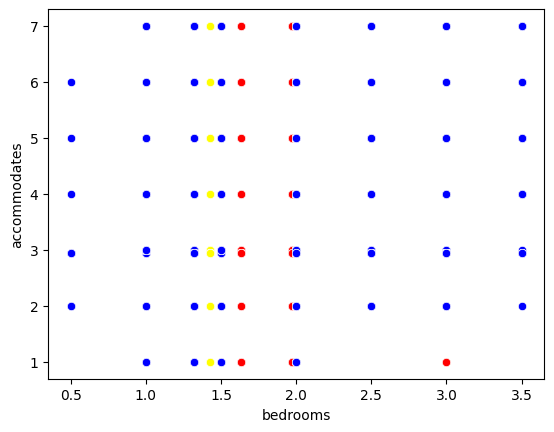

In [1587]:
#Imprimimos el scatter plot entre la variable dependiente "accommodates" e independiente "accommodates"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='bedrooms',y='accommodates',color='yellow',data=df)
sns.scatterplot(x='beds',y='accommodates',color='red',data=df)
sns.scatterplot(x='bathrooms',y='accommodates',color='blue',data=df)

In [1588]:
print(df.isna().sum())  # Verifica NaN por columna

Predicciones                                       0
Unnamed: 0.1                                       0
host_response_rate                              1854
host_acceptance_rate                               0
host_is_superhost                                  0
host_identity_verified                             0
room_type                                          0
has_availability                                   0
instant_bookable                                   0
id                                                 0
host_id                                            0
host_listings_count                                0
host_total_listings_count                          0
accommodates                                       0
bathrooms                                          0
bedrooms                                           0
beds                                               0
price                                              0
minimum_nights                                

In [1589]:
df = df.fillna(0)  # Reemplaza todos los NaN en el DataFrame por 0
print(df.isna().sum().sum())  # Debería imprimir 0 si ya no hay NaN


0


In [1590]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['bedrooms','beds','bathrooms']]
Var_Dep = df['accommodates']

In [1591]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [1592]:
type(model)

sklearn.linear_model._base.LinearRegression

In [1593]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [1594]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bedrooms', 'beds', 'bathrooms'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.97632495, 0.7184201 , 0.13419541]),
 'rank_': 3,
 'singular_': array([117.500403  ,  67.29359357,  51.69014556]),
 'intercept_': np.float64(0.4148915947309937)}

In [1595]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.5484959155597924

In [1596]:
#Predecimos los valores de total de accidentes a partir de las variables: "host_is_superhost", "host_identity_verified" y "bathrooms"
y_pred= model.predict(X=df[['bedrooms', 'beds', 'bathrooms']])
y_pred

array([2.24383206, 3.36051928, 3.93857711, ..., 2.24383206, 2.96225216,
       2.24383206], shape=(17363,))

In [1597]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones6', y_pred)
df

Predicciones6  Predicciones  Unnamed: 0.1  host_response_rate  \
0           2.243832  1.302494e+08             0                0.00   
1           3.360519  1.302494e+08             1                1.00   
2           3.938577  1.302494e+08             2                0.71   
3           2.243832  1.302494e+08             3                1.00   
4           2.310930  1.302494e+08             4                1.00   
...              ...           ...           ...                 ...   
17358       5.633322  3.158846e+08         26572                0.00   
17359       4.072773  3.158869e+08         26573                0.00   
17360       2.243832  3.159058e+08         26574                0.00   
17361       2.962252  3.159104e+08         26575                1.00   
17362       2.243832  3.159739e+08         26581                1.00   

       host_acceptance_rate  host_is_superhost  host_identity_verified  \
0                      0.00                  2                       1   
1                      0.93                  1                       1   
2                      0.57                  1                       1   
3                      1.00                  1                       1   
4                      1.00                  1                       1   
...                     ...                ...                     ...   
17358                  0.00                  2                       1   
17359                  0.00                  2                       1   
17360                  0.00                  2                       1   
17361                  1.00                  1                       1   
17362                  1.00                  1                       1   

       room_type  has_availability  instant_bookable  ...  \
0              1                 1                 2  ...   
1              1                 1                 2  ...   
2              1                 1                 2  ...   
3              1                 1                 2  ...   
4              1                 1                 2  ...   
...          ...               ...               ...  ...   
17358          1                 1                 2  ...   
17359          1                 1                 2  ...   
17360          1                 2                 2  ...   
17361          1                 1                 1  ...   
17362          1                 1                 1  ...   

       review_scores_accuracy  review_scores_cleanliness  \
0                        4.79                       4.76   
1                        4.88                       4.70   
2                        4.81                       4.75   
3                        4.90                       4.96   
4                        5.00                       5.00   
...                       ...                        ...   
17358                    4.79                       4.76   
17359                    4.79                       4.76   
17360                    4.79                       4.76   
17361                    4.79                       4.76   
17362                    4.79                       4.76   

       review_scores_checkin  review_scores_communication  \
0                       4.84                         4.83   
1                       4.87                         4.78   
2                       4.94                         4.92   
3                       4.96                         4.98   
4                       5.00                         4.92   
...                      ...                          ...   
17358                   4.84                         4.83   
17359                   4.84                         4.83   
17360                   4.84                         4.83   
17361                   4.84                         4.83   
17362                   4.84                         4.83   

       review_scores_location  calculated_host_listings_count  \
0

<Axes: xlabel='bedrooms', ylabel='accommodates'>

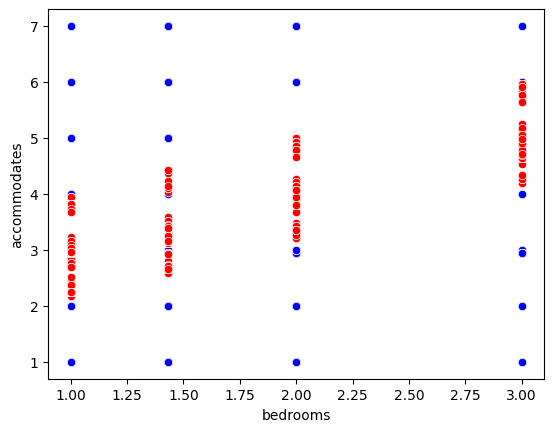

In [1598]:
#Visualizamos la gráfica comparativa entre el total real y el total predechost_listings_count

sns.scatterplot(x='bedrooms', y='accommodates', color="blue", data=df)
sns.scatterplot(x='bedrooms', y='Predicciones6', color="red", data=df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [1599]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.5484959155597924

In [1600]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.7406051009544778)

In [1601]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors = df.corr()
Corr_Factors

Predicciones6  Predicciones  \
Predicciones6                                      1.000000     -0.022532   
Predicciones                                      -0.022532      1.000000   
Unnamed: 0.1                                      -0.028154      0.945858   
host_response_rate                                -0.022101      0.133829   
host_acceptance_rate                              -0.029773      0.136854   
host_is_superhost                                 -0.021798     -0.001483   
host_identity_verified                             0.001375     -0.067601   
room_type                                               NaN           NaN   
has_availability                                   0.003537     -0.044346   
instant_bookable                                   0.052656     -0.199933   
id                                                -0.022532      1.000000   
host_id                                           -0.029132      0.384885   
host_listings_count                               -0.100818      0.078661   
host_total_listings_count                         -0.084155      0.055702   
accommodates                                       0.740605     -0.003262   
bathrooms                                          0.569251      0.026285   
bedrooms                                           0.918303     -0.004203   
beds                                               0.827920     -0.047475   
price                                              0.198833      0.104098   
minimum_nights                                     0.067509     -0.148562   
maximum_nights                                     0.015196     -0.271543   
availability_30                                   -0.047162      0.142054   
availability_60                                   -0.070191      0.152813   
availability_90                                   -0.071624      0.079504   
availability_365                                  -0.049759      0.102669   
number_of_reviews                                  0.021733     -0.370670   
number_of_reviews_ltm                              0.016903     -0.090766   
number_of_reviews_l30d                             0.007413      0.071126   
review_scores_accuracy                             0.040951      0.079548   
review_scores_cleanliness                          0.000766      0.095479   
review_scores_checkin                              0.005141      0.056245   
review_scores_communication                        0.015500      0.044378   
review_scores_location                             0.016990      0.066219   
calculated_host_listings_count                    -0.097330      0.067831   
calculated_host_listings_count_entire_homes       -0.075441      0.035929   
calculated_host_listings_count_private_rooms      -0.061949      0.037010   
calculated_host_listings_count_shared_rooms             NaN           NaN   
reviews_per_month                                  0.006989      0.134152   

                                              Unnamed: 0.1  \
Predicciones6                                    -0.028154   
Predicciones                                      0.945858   
Unnamed: 0.1                                      1.000000   
host_response_rate                                0.131233   
host_acceptance_rate                              0.137664   
host_is_superhost                                 0.014700   
host_identity_verified                           -0.066643   
room_type                                              NaN   
has_availability                                 -0.042985   
instant_bookable                                 -0.213561   
id                                                0.945858   
host_id                                           0.423006   
host_listings_count                               0.087138   
host_total_listings_count                         0.061407   
accommodates                                     -0.008780   
bathrooms                                         

In [1602]:
#Encontramos el valor absoluto de las todas correlaciones
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

Predicciones6  Predicciones  \
Predicciones6                                      1.000000      0.022532   
Predicciones                                       0.022532      1.000000   
Unnamed: 0.1                                       0.028154      0.945858   
host_response_rate                                 0.022101      0.133829   
host_acceptance_rate                               0.029773      0.136854   
host_is_superhost                                  0.021798      0.001483   
host_identity_verified                             0.001375      0.067601   
room_type                                               NaN           NaN   
has_availability                                   0.003537      0.044346   
instant_bookable                                   0.052656      0.199933   
id                                                 0.022532      1.000000   
host_id                                            0.029132      0.384885   
host_listings_count                                0.100818      0.078661   
host_total_listings_count                          0.084155      0.055702   
accommodates                                       0.740605      0.003262   
bathrooms                                          0.569251      0.026285   
bedrooms                                           0.918303      0.004203   
beds                                               0.827920      0.047475   
price                                              0.198833      0.104098   
minimum_nights                                     0.067509      0.148562   
maximum_nights                                     0.015196      0.271543   
availability_30                                    0.047162      0.142054   
availability_60                                    0.070191      0.152813   
availability_90                                    0.071624      0.079504   
availability_365                                   0.049759      0.102669   
number_of_reviews                                  0.021733      0.370670   
number_of_reviews_ltm                              0.016903      0.090766   
number_of_reviews_l30d                             0.007413      0.071126   
review_scores_accuracy                             0.040951      0.079548   
review_scores_cleanliness                          0.000766      0.095479   
review_scores_checkin                              0.005141      0.056245   
review_scores_communication                        0.015500      0.044378   
review_scores_location                             0.016990      0.066219   
calculated_host_listings_count                     0.097330      0.067831   
calculated_host_listings_count_entire_homes        0.075441      0.035929   
calculated_host_listings_count_private_rooms       0.061949      0.037010   
calculated_host_listings_count_shared_rooms             NaN           NaN   
reviews_per_month                                  0.006989      0.134152   

                                              Unnamed: 0.1  \
Predicciones6                                     0.028154   
Predicciones                                      0.945858   
Unnamed: 0.1                                      1.000000   
host_response_rate                                0.131233   
host_acceptance_rate                              0.137664   
host_is_superhost                                 0.014700   
host_identity_verified                            0.066643   
room_type                                              NaN   
has_availability                                  0.042985   
instant_bookable                                  0.213561   
id                                                0.945858   
host_id                                           0.423006   
host_listings_count                               0.087138   
host_total_listings_count                         0.061407   
accommodates                                      0.008780   
bathrooms                                         

In [1603]:
Corr_Factors1= Corr_Factors1['accommodates'].sort_values(ascending=False)
Corr_Factors1

accommodates                                    1.000000
Predicciones6                                   0.740605
bedrooms                                        0.680100
beds                                            0.613161
bathrooms                                       0.421591
price                                           0.194701
number_of_reviews_ltm                           0.066100
host_listings_count                             0.060812
calculated_host_listings_count_private_rooms    0.056422
number_of_reviews                               0.054483
calculated_host_listings_count                  0.051825
reviews_per_month                               0.051781
number_of_reviews_l30d                          0.046814
calculated_host_listings_count_entire_homes     0.040651
host_total_listings_count                       0.040536
availability_90                                 0.039069
review_scores_accuracy                          0.035128
host_is_superhost              

Price


In [1604]:
#Cargar archivo csv desde seaborn
df= pd.read_csv('Mexico_Entire-Home-Apt_Limpio.csv')
df.head(5)

Predicciones  Unnamed: 0.1  host_response_rate  host_acceptance_rate  \
0  1.302494e+08             0                0.00                  0.00   
1  1.302494e+08             1                1.00                  0.93   
2  1.302494e+08             2                0.71                  0.57   
3  1.302494e+08             3                1.00                  1.00   
4  1.302494e+08             4                1.00                  1.00   

   host_is_superhost  host_identity_verified  room_type  has_availability  \
0                  2                       1          1                 1   
1                  1                       1          1                 1   
2                  1                       1          1                 1   
3                  1                       1          1                 1   
4                  1                       1          1                 1   

   instant_bookable      id  ...  review_scores_accuracy  \
0                 2   35797  ...                    4.79   
1                 2   44616  ...                    4.88   
2                 2   67703  ...                    4.81   
3                 2   70644  ...                    4.90   
4                 2  107078  ...                    5.00   

   review_scores_cleanliness  review_scores_checkin  \
0                       4.76                   4.84   
1                       4.70                   4.87   
2                       4.75                   4.94   
3                       4.96                   4.96   
4                       5.00                   5.00   

   review_scores_communication  review_scores_location  \
0                         4.83                    4.85   
1                         4.78                    4.98   
2                         4.92                    4.98   
3                         4.98                    4.96   
4                         4.92                    4.91   

   calculated_host_listings_count  \
0                             1.0   
1                             8.0   
2                             2.0   
3                             3.0   
4                             3.0   

   calculated_host_listings_count_entire_homes  \
0                                          1.0   
1                                          4.0   
2                                          2.0   
3                                          2.0   
4                                          3.0   

   calculated_host_listings_count_private_rooms  \
0                                           0.0   
1                                           1.0   
2                                           0.0   
3                                           1.0   
4                                           0.0   

   calculated_host_listings_count_shared_rooms  reviews_per_month  
0                                          0.0               1.74  
1                                          0.0               0.41  
2                                          0.0               0.31  
3                                          0.0               0.83  
4                                          0.0               0.11  

[5 rows x 37 columns]

<Axes: xlabel='bathrooms', ylabel='price'>

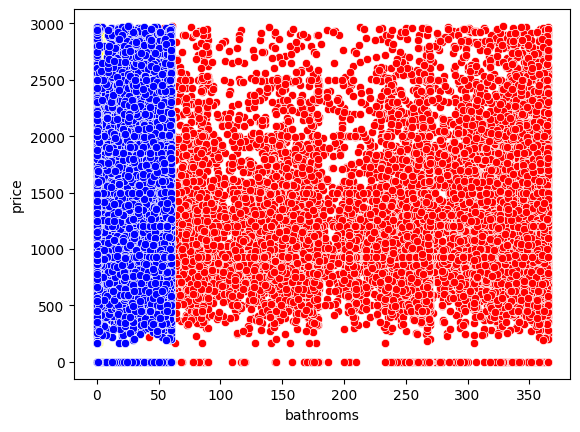

In [1605]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "price"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='bathrooms',y='price',color='yellow',data=df)
sns.scatterplot(x='availability_365',y='price',color='red',data=df)
sns.scatterplot(x='availability_60',y='price',color='blue',data=df)

In [1606]:
print(df.isna().sum())  # Verifica NaN por columna

Predicciones                                       0
Unnamed: 0.1                                       0
host_response_rate                              1854
host_acceptance_rate                               0
host_is_superhost                                  0
host_identity_verified                             0
room_type                                          0
has_availability                                   0
instant_bookable                                   0
id                                                 0
host_id                                            0
host_listings_count                                0
host_total_listings_count                          0
accommodates                                       0
bathrooms                                          0
bedrooms                                           0
beds                                               0
price                                              0
minimum_nights                                

In [1607]:
df = df.fillna(0)  # Reemplaza todos los NaN en el DataFrame por 0
print(df.isna().sum().sum())  # Debería imprimir 0 si ya no hay NaN


0


In [1608]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['bathrooms','availability_365','availability_60']]
Var_Dep = df['price']

In [1609]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [1610]:
type(model)

sklearn.linear_model._base.LinearRegression

In [1611]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [1612]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms', 'availability_365', 'availability_60'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([402.55714682,   0.85866768,   3.61228295]),
 'rank_': 3,
 'singular_': array([16501.98023907,  2295.71809063,    77.48502395]),
 'intercept_': np.float64(268.8016600195832)}

In [1613]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.21344113939651999

In [1614]:
#Predecimos los valores de total de accidentes a partir de las variables: "host_is_superhost", "host_identity_verified" y "bathrooms"
y_pred= model.predict(X=df[['bathrooms', 'availability_365', 'availability_60']])
y_pred

array([1192.56758764, 1037.12059527, 1022.67146346, ..., 1029.24311529,
       1076.50048331,  973.54854124], shape=(17363,))

In [1615]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones6', y_pred)
df

Predicciones6  Predicciones  Unnamed: 0.1  host_response_rate  \
0        1192.567588  1.302494e+08             0                0.00   
1        1037.120595  1.302494e+08             1                1.00   
2        1022.671463  1.302494e+08             2                0.71   
3         989.568042  1.302494e+08             3                1.00   
4        1141.281540  1.302494e+08             4                1.00   
...              ...           ...           ...                 ...   
17358    1143.387131  3.158846e+08         26572                0.00   
17359    1550.415228  3.158869e+08         26573                0.00   
17360    1029.243115  3.159058e+08         26574                0.00   
17361    1076.500483  3.159104e+08         26575                1.00   
17362     973.548541  3.159739e+08         26581                1.00   

       host_acceptance_rate  host_is_superhost  host_identity_verified  \
0                      0.00                  2                       1   
1                      0.93                  1                       1   
2                      0.57                  1                       1   
3                      1.00                  1                       1   
4                      1.00                  1                       1   
...                     ...                ...                     ...   
17358                  0.00                  2                       1   
17359                  0.00                  2                       1   
17360                  0.00                  2                       1   
17361                  1.00                  1                       1   
17362                  1.00                  1                       1   

       room_type  has_availability  instant_bookable  ...  \
0              1                 1                 2  ...   
1              1                 1                 2  ...   
2              1                 1                 2  ...   
3              1                 1                 2  ...   
4              1                 1                 2  ...   
...          ...               ...               ...  ...   
17358          1                 1                 2  ...   
17359          1                 1                 2  ...   
17360          1                 2                 2  ...   
17361          1                 1                 1  ...   
17362          1                 1                 1  ...   

       review_scores_accuracy  review_scores_cleanliness  \
0                        4.79                       4.76   
1                        4.88                       4.70   
2                        4.81                       4.75   
3                        4.90                       4.96   
4                        5.00                       5.00   
...                       ...                        ...   
17358                    4.79                       4.76   
17359                    4.79                       4.76   
17360                    4.79                       4.76   
17361                    4.79                       4.76   
17362                    4.79                       4.76   

       review_scores_checkin  review_scores_communication  \
0                       4.84                         4.83   
1                       4.87                         4.78   
2                       4.94                         4.92   
3                       4.96                         4.98   
4                       5.00                         4.92   
...                      ...                          ...   
17358                   4.84                         4.83   
17359                   4.84                         4.83   
17360                   4.84                         4.83   
17361                   4.84                         4.83   
17362                   4.84                         4.83   

       review_scores_location  calculated_host_listings_count  \
0

<Axes: xlabel='bathrooms', ylabel='price'>

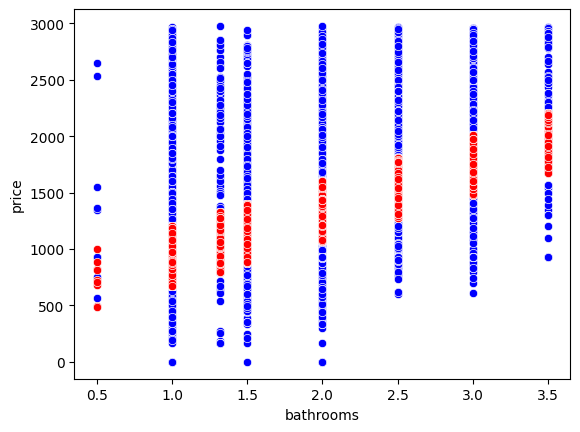

In [1616]:
#Visualizamos la gráfica comparativa entre el total real y el total predecbathrooms

sns.scatterplot(x='bathrooms', y='price', color="blue", data=df)
sns.scatterplot(x='bathrooms', y='Predicciones6' ,color='red',data=df)

In [1617]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.21344113939651999

In [1618]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.46199690409841493)

In [1619]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors = df.corr()
Corr_Factors

Predicciones6  Predicciones  \
Predicciones6                                      1.000000      0.097478   
Predicciones                                       0.097478      1.000000   
Unnamed: 0.1                                       0.097109      0.945858   
host_response_rate                                 0.157060      0.133829   
host_acceptance_rate                               0.119622      0.136854   
host_is_superhost                                 -0.064215     -0.001483   
host_identity_verified                            -0.141142     -0.067601   
room_type                                               NaN           NaN   
has_availability                                  -0.149951     -0.044346   
instant_bookable                                  -0.102932     -0.199933   
id                                                 0.097478      1.000000   
host_id                                            0.034651      0.384885   
host_listings_count                                0.050004      0.078661   
host_total_listings_count                          0.057745      0.055702   
accommodates                                       0.333000     -0.003262   
bathrooms                                          0.841310      0.026285   
bedrooms                                           0.409370     -0.004203   
beds                                               0.227965     -0.047475   
price                                              0.461997      0.104098   
minimum_nights                                    -0.054506     -0.148562   
maximum_nights                                     0.025693     -0.271543   
availability_30                                    0.418748      0.142054   
availability_60                                    0.461049      0.152813   
availability_90                                    0.223405      0.079504   
availability_365                                   0.548807      0.102669   
number_of_reviews                                  0.018152     -0.370670   
number_of_reviews_ltm                              0.070186     -0.090766   
number_of_reviews_l30d                             0.073219      0.071126   
review_scores_accuracy                            -0.004130      0.079548   
review_scores_cleanliness                         -0.001917      0.095479   
review_scores_checkin                             -0.022930      0.056245   
review_scores_communication                       -0.027510      0.044378   
review_scores_location                             0.020194      0.066219   
calculated_host_listings_count                     0.054863      0.067831   
calculated_host_listings_count_entire_homes        0.035056      0.035929   
calculated_host_listings_count_private_rooms      -0.003131      0.037010   
calculated_host_listings_count_shared_rooms             NaN           NaN   
reviews_per_month                                  0.074756      0.134152   

                                              Unnamed: 0.1  \
Predicciones6                                     0.097109   
Predicciones                                      0.945858   
Unnamed: 0.1                                      1.000000   
host_response_rate                                0.131233   
host_acceptance_rate                              0.137664   
host_is_superhost                                 0.014700   
host_identity_verified                           -0.066643   
room_type                                              NaN   
has_availability                                 -0.042985   
instant_bookable                                 -0.213561   
id                                                0.945858   
host_id                                           0.423006   
host_listings_count                               0.087138   
host_total_listings_count                         0.061407   
accommodates                                     -0.008780   
bathrooms                                         

In [1620]:
#Encontramos el valor absoluto de las todas correlaciones
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

Predicciones6  Predicciones  \
Predicciones6                                      1.000000      0.097478   
Predicciones                                       0.097478      1.000000   
Unnamed: 0.1                                       0.097109      0.945858   
host_response_rate                                 0.157060      0.133829   
host_acceptance_rate                               0.119622      0.136854   
host_is_superhost                                  0.064215      0.001483   
host_identity_verified                             0.141142      0.067601   
room_type                                               NaN           NaN   
has_availability                                   0.149951      0.044346   
instant_bookable                                   0.102932      0.199933   
id                                                 0.097478      1.000000   
host_id                                            0.034651      0.384885   
host_listings_count                                0.050004      0.078661   
host_total_listings_count                          0.057745      0.055702   
accommodates                                       0.333000      0.003262   
bathrooms                                          0.841310      0.026285   
bedrooms                                           0.409370      0.004203   
beds                                               0.227965      0.047475   
price                                              0.461997      0.104098   
minimum_nights                                     0.054506      0.148562   
maximum_nights                                     0.025693      0.271543   
availability_30                                    0.418748      0.142054   
availability_60                                    0.461049      0.152813   
availability_90                                    0.223405      0.079504   
availability_365                                   0.548807      0.102669   
number_of_reviews                                  0.018152      0.370670   
number_of_reviews_ltm                              0.070186      0.090766   
number_of_reviews_l30d                             0.073219      0.071126   
review_scores_accuracy                             0.004130      0.079548   
review_scores_cleanliness                          0.001917      0.095479   
review_scores_checkin                              0.022930      0.056245   
review_scores_communication                        0.027510      0.044378   
review_scores_location                             0.020194      0.066219   
calculated_host_listings_count                     0.054863      0.067831   
calculated_host_listings_count_entire_homes        0.035056      0.035929   
calculated_host_listings_count_private_rooms       0.003131      0.037010   
calculated_host_listings_count_shared_rooms             NaN           NaN   
reviews_per_month                                  0.074756      0.134152   

                                              Unnamed: 0.1  \
Predicciones6                                     0.097109   
Predicciones                                      0.945858   
Unnamed: 0.1                                      1.000000   
host_response_rate                                0.131233   
host_acceptance_rate                              0.137664   
host_is_superhost                                 0.014700   
host_identity_verified                            0.066643   
room_type                                              NaN   
has_availability                                  0.042985   
instant_bookable                                  0.213561   
id                                                0.945858   
host_id                                           0.423006   
host_listings_count                               0.087138   
host_total_listings_count                         0.061407   
accommodates                                      0.008780   
bathrooms                                         

In [1621]:
Corr_Factors1= Corr_Factors1['price'].sort_values(ascending=False)
Corr_Factors1

price                                           1.000000
Predicciones6                                   0.461997
bathrooms                                       0.388683
availability_365                                0.253547
availability_60                                 0.213003
host_response_rate                              0.208488
bedrooms                                        0.204184
host_acceptance_rate                            0.203903
availability_30                                 0.198505
accommodates                                    0.194701
has_availability                                0.172929
host_identity_verified                          0.154529
instant_bookable                                0.143512
host_is_superhost                               0.124232
calculated_host_listings_count                  0.105491
id                                              0.104098
Predicciones                                    0.104098
calculated_host_listings_count_

Paris Review Scores Value y Review Per Month

In [1622]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1623]:
#Cargar archivo csv desde seaborn
df= pd.read_csv('Paris_Entire-Home-Apt.csv')
df.head(5)

C:\Users\joker\AppData\Local\Temp\ipykernel_4088\103643887.py:2: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('Paris_Entire-Home-Apt.csv')


Unnamed: 0.1  Unnamed: 0      id                          listing_url  \
0             0           0    3109    https://www.airbnb.com/rooms/3109   
1             1           1    5396    https://www.airbnb.com/rooms/5396   
2             2           2    7397    https://www.airbnb.com/rooms/7397   
3             3           3    7964    https://www.airbnb.com/rooms/7964   
4             4           4  241715  https://www.airbnb.com/rooms/241715   

  last_scraped                                        description  host_id  \
0   2024-09-11  Lovely Appartment with one bedroom with a Quee...     3631   
1   2024-09-13  NEW SOFA-BED SINCE JUNE 2023, Please disregard...     7903   
2   2024-09-06          VERY CONVENIENT, WITH THE BEST LOCATION !     2626   
3   2024-09-10  We are renting our a spacious, sunny fully fur...    22155   
4   2024-09-11  Come to stay in our unique Parisian flat to en...  3342097   

                                    host_url  host_since host_response_time  \
0     https://www.airbnb.com/users/show/3631  2008-10-14     within an hour   
1     https://www.airbnb.com/users/show/7903  2009-02-14     within an hour   
2     https://www.airbnb.com/users/show/2626  2008-08-30     within an hour   
3    https://www.airbnb.com/users/show/22155  2009-06-18     within an hour   
4  https://www.airbnb.com/users/show/3342097  2012-08-22     within an hour   

   ... review_scores_checkin review_scores_communication  \
0  ...                  5.00                        5.00   
1  ...                  4.81                        4.84   
2  ...                  4.92                        4.89   
3  ...                  5.00                        5.00   
4  ...                  4.80                        4.83   

  review_scores_location        license instant_bookable  \
0                   5.00  7511409139079                t   
1                   4.96  7510402838018                f   
2                   4.93  7510400829623                f   
3                   5.00  7510903576564                f   
4                   4.81  7511913070313                f   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                              1                                           1   
1                              1                                           1   
2                              1                                           1   
3                              1                                           1   
4                              1                                           1   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              0.05  
1                                           0              2.23  
2                                           0              2.20  
3                                           0              0.03  
4                                           0              1.09  

[5 rows x 52 columns]

In [1624]:
# Eliminar columnas 'Unnamed: 0' y 'Unnamed 01' si están presentes en el DataFrame
df = df.drop(columns=[col for col in ['Unnamed: 0', 'Unnamed 0.1'] if col in df.columns])

# Verificar que las columnas han sido eliminadas
print("Columnas actuales en el DataFrame:", df.columns)


Columnas actuales en el DataFrame: Index(['Unnamed: 0.1', 'id', 'listing_url', 'last_scraped', 'description',
       'host_id', 'host_url', 'host_since', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'calendar_last_scraped', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'first_review', 'last_review',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'license', 'instant_bookable',


In [1625]:
# Identificar columnas con valores 't' y 'f'
bool_columns = df.columns[df.isin(['t', 'f']).any()]

# Reemplazar 't' por 1 y 'f' por 2 en esas columnas
df[bool_columns] = df[bool_columns].replace({'t': 1, 'f': 2})

C:\Users\joker\AppData\Local\Temp\ipykernel_4088\746722446.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[bool_columns] = df[bool_columns].replace({'t': 1, 'f': 2})


In [1626]:
# Reemplazar valores faltantes y convertir a número
df["host_acceptance_rate"] = df["host_acceptance_rate"].astype(str)  # Convertir todo a string
df["host_acceptance_rate"] = df["host_acceptance_rate"].replace("No contiene host_acceptance_rate", "0%")
df["host_acceptance_rate"] = df["host_acceptance_rate"].str.rstrip("%").astype(float) / 100  # Eliminar "%" y convertir a float

# Verificar que ahora sean valores numéricos
print(df["host_acceptance_rate"].dtype)  # Debe ser float

float64


In [1627]:
# Identificar columnas de tipo string
string_columns = df.select_dtypes(include=['object']).columns

In [1628]:

# Mostrar las columnas detectadas
print("Columnas de tipo string detectadas:")
print(string_columns)


Columnas de tipo string detectadas:
Index(['listing_url', 'last_scraped', 'description', 'host_url', 'host_since',
       'host_response_time', 'host_response_rate', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed',
       'property_type', 'room_type', 'amenities', 'calendar_last_scraped',
       'first_review', 'last_review', 'license'],
      dtype='object')


<Axes: xlabel='number_of_reviews_ltm', ylabel='reviews_per_month'>

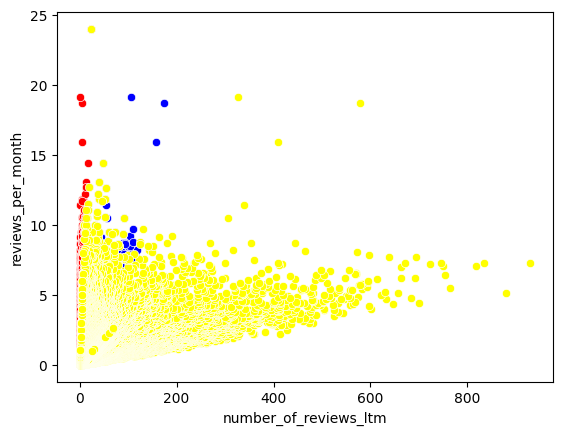

In [1658]:
#Imprimimos el scatter plot entre la variable dependiente "reviews_per_month" e independiente "reviews_per_month"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='number_of_reviews_ltm',y='reviews_per_month',color='blue',data=df)
sns.scatterplot(x='number_of_reviews_l30d',y='reviews_per_month',color='red',data=df)
sns.scatterplot(x='number_of_reviews',y='reviews_per_month',color='yellow',data=df)

In [1659]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['number_of_reviews_ltm','number_of_reviews_l30d','number_of_reviews']]
Var_Dep = df['reviews_per_month']

In [1660]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [1661]:
type(model)

sklearn.linear_model._base.LinearRegression

In [1662]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)


LinearRegression()

In [1663]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews_ltm', 'number_of_reviews_l30d',
        'number_of_reviews'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 0.05549736,  0.36268522, -0.00129909]),
 'rank_': 3,
 'singular_': array([13110.4790749 ,  2289.29169892,   236.21263378]),
 'intercept_': np.float64(0.6599053832745406)}

In [1664]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.5981563679132484

In [1665]:
#Predecimos los valores de total de accidentes a partir de las variables: "host_is_superhost", "host_identity_verified" y "bathrooms"
y_pred= model.predict(X=df[['number_of_reviews_ltm', 'number_of_reviews_l30d', 'number_of_reviews']])
y_pred

array([0.65470901, 4.01210016, 1.77585927, ..., 0.65990538, 0.65990538,
       0.65990538], shape=(85268,))

In [1667]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones9', y_pred)
df

Predicciones9  Predicciones8  Unnamed: 0.1                   id  \
0           0.654709   7.862945e+07             0                 3109   
1           4.012100   7.862945e+07             1                 5396   
2           1.775859   7.862945e+07             2                 7397   
3           0.653410   7.862945e+07             3                 7964   
4           0.659905   7.862945e+07             4               241715   
...              ...            ...           ...                  ...   
85263       0.659905   2.815712e+08         95455  1238563676697016528   
85264       1.076789   2.815720e+08         95456  1238568635341928457   
85265       0.659905   2.815762e+08         95457  1238594326004996232   
85266       0.659905   2.816625e+08         95459  1239120896239244086   
85267       0.659905   2.816651e+08         95460  1239136641042729451   

         host_id  host_response_rate  host_acceptance_rate  host_is_superhost  \
0           3631                 NaN                0.0067                  2   
1           7903                1.00                0.0094                  1   
2           2626                1.00                0.0067                  1   
3          22155                 NaN                0.0000                  2   
4        3342097                 NaN                   NaN                  2   
...          ...                 ...                   ...                ...   
85263   35084418                1.00                0.0053                  2   
85264  539077658                1.00                0.0099                  1   
85265  492686946                1.00                0.0099                  2   
85266  169497320                0.27                0.0008                  2   
85267  564251645                0.94                0.0099                  2   

      host_listings_count host_total_listings_count  ...  \
0                     1.0                       1.0  ...   
1                     2.0                       4.0  ...   
2                     1.0                      10.0  ...   
3                     1.0                       1.0  ...   
4                     1.0                       2.0  ...   
...                   ...                       ...  ...   
85263                 1.0                       2.0  ...   
85264                 2.0                       3.0  ...   
85265                 7.0                       7.0  ...   
85266                45.0                      65.0  ...   
85267               203.0                     245.0  ...   

       review_scores_cleanliness  review_scores_checkin  \
0                           5.00                   5.00   
1                           4.59                   4.81   
2                           4.45                   4.92   
3                           5.00                   5.00   
4                           4.65                   4.80   
...                          ...                    ...   
85263                       4.65                   4.80   
85264                       5.00                   5.00   
85265                       4.65                   4.80   
85266                       4.65                   4.80   
85267                       4.65                   4.80   

       review_scores_communication  review_scores_location  instant_bookable  \
0                             5.00                    5.00                 1   
1                             4.84                    4.96                 2   
2                             4.89                    4.93                 2   
3                             5.00                    5.00                 2   
4                             4.83                    4.81                 2   
...                            ...                     ...               ...   
85263                         4.83                    4.81                 2   
85264                         5.00                    5.00                 

<Axes: xlabel='number_of_reviews_ltm', ylabel='reviews_per_month'>

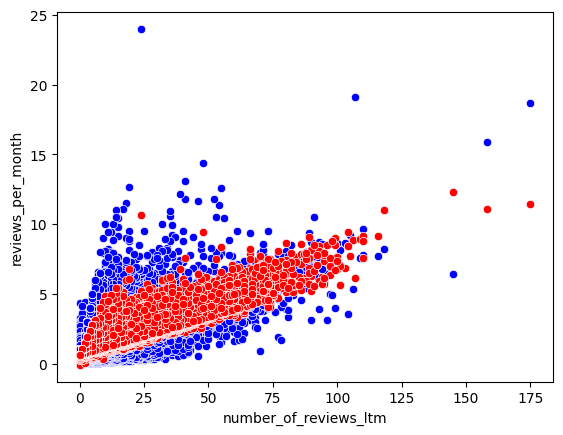

In [1668]:
#Visualizamos la gráfica comparativa entre el total real y el total predecnumber_of_reviews_ltmo

sns.scatterplot(x='number_of_reviews_ltm', y='reviews_per_month', color="blue", data=df)
sns.scatterplot(x='number_of_reviews_ltm', y='Predicciones9', color="red", data=df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [1669]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.5981563679132484

In [1670]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.7734056942596482)

In [1671]:
#Eliminamos las columnas tipo String para poder realizar la regresión lineal
df = df.drop(['listing_url', 'last_scraped', 'host_url', 'host_since',
       'host_response_time', 'host_verifications', 'neighbourhood',
       'neighbourhood_cleansed', 'property_type', 'amenities','description',
       'calendar_last_scraped', 'first_review', 'last_review', 'license'], axis=1)

df.info(5)

KeyError: "['listing_url', 'last_scraped', 'host_url', 'host_since', 'host_response_time', 'host_verifications', 'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'amenities', 'description', 'calendar_last_scraped', 'first_review', 'last_review', 'license'] not found in axis"

In [1644]:
# Identificar columnas que siguen siendo de tipo objeto
non_numeric_columns = df.select_dtypes(include=['object']).columns

# Mostrar algunos valores de estas columnas
for col in non_numeric_columns:
    print(f"Valores en la columna {col}:")
    print(df[col].unique()[:10])  # Muestra los primeros 10 valores únicos


Valores en la columna host_response_rate:
[nan '100%' '0%' '50%' '60%' '90%' '10%' '86%' '20%' '99%']
Valores en la columna host_listings_count:
['1.0' '2.0' '3.0' '24.0' '13.0' '4.0' '48.0' '106.0' '7.0' '5.0']
Valores en la columna host_total_listings_count:
['1.0' '4.0' '10.0' '2.0' '5.0' '3.0' '26.0' '8.0' '31.0' '49.0']
Valores en la columna host_identity_verified:
[1 2 'No Hay']
Valores en la columna room_type:
['Entire home/apt']


In [1645]:
# Verificar que las columnas han sido eliminadas
print("Columnas actuales en el DataFrame:", df.columns)

Columnas actuales en el DataFrame: Index(['Predicciones8', 'Unnamed: 0.1', 'id', 'host_id', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_identity_verified', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'instant_bookable', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object')


In [1646]:
# Identificar columnas que contienen valores en formato de porcentaje
percentage_columns = [col for col in df.select_dtypes(include=['object']).columns 
                      if df[col].astype(str).str.contains('%').any()]

# Convertir valores de porcentaje a decimal
for col in percentage_columns:
    df[col] = df[col].str.replace('%', '', regex=True)  # Eliminar '%'
    df[col] = pd.to_numeric(df[col], errors='coerce') / 100  # Convertir a número en decimal

# Verificar que la conversión fue exitosa
print("Columnas convertidas a decimal:", percentage_columns)
print(df[percentage_columns].head())  # Muestra los primeros valores convertidos

Columnas convertidas a decimal: ['host_response_rate']
   host_response_rate
0                 NaN
1                 1.0
2                 1.0
3                 NaN
4                 NaN


In [1647]:
# Reemplazar 'Entire home/apt' por el número 1 en todas las columnas donde aparezca
df = df.replace('Entire home/apt', 1)

# Verificar si el reemplazo fue exitoso
print(df.head())


   Predicciones8  Unnamed: 0.1      id  host_id  host_response_rate  \
0   7.862945e+07             0    3109     3631                 NaN   
1   7.862945e+07             1    5396     7903                 1.0   
2   7.862945e+07             2    7397     2626                 1.0   
3   7.862945e+07             3    7964    22155                 NaN   
4   7.862945e+07             4  241715  3342097                 NaN   

   host_acceptance_rate  host_is_superhost host_listings_count  \
0                  0.67                  2                 1.0   
1                  0.94                  1                 2.0   
2                  0.67                  1                 1.0   
3                  0.00                  2                 1.0   
4                   NaN                  2                 1.0   

  host_total_listings_count host_identity_verified  ...  \
0                       1.0                      1  ...   
1                       4.0                      1  ...   

C:\Users\joker\AppData\Local\Temp\ipykernel_4088\2540725974.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('Entire home/apt', 1)


In [1651]:
# Reemplazar 'No Hay' por 0 en todo el DataFrame
df.replace("No Hay", 0, inplace=True)

C:\Users\joker\AppData\Local\Temp\ipykernel_4088\3553204480.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace("No Hay", 0, inplace=True)


In [1672]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors = df.corr()
Corr_Factors

Predicciones9  Predicciones8  \
Predicciones9                                      1.000000       0.039115   
Predicciones8                                      0.039115       1.000000   
Unnamed: 0.1                                       0.022015       0.937744   
id                                                 0.039115       1.000000   
host_id                                            0.104507       0.407849   
host_response_rate                                 0.157940      -0.013757   
host_acceptance_rate                               0.241802       0.030202   
host_is_superhost                                 -0.341372       0.029318   
host_listings_count                               -0.021607       0.092483   
host_total_listings_count                         -0.017043       0.077132   
host_identity_verified                            -0.091395      -0.097917   
room_type                                               NaN            NaN   
accommodates                                       0.075349       0.081212   
bathrooms                                          0.068343       0.070470   
bedrooms                                          -0.035197       0.044671   
beds                                               0.065891      -0.042581   
price                                             -0.005005      -0.001059   
minimum_nights                                    -0.198144      -0.423658   
maximum_nights                                    -0.000743      -0.004310   
has_availability                                  -0.120013       0.002030   
availability_30                                   -0.038457       0.151265   
availability_60                                    0.015453       0.172951   
availability_90                                    0.051071       0.188465   
availability_365                                   0.096536       0.196316   
number_of_reviews                                  0.526453      -0.338943   
number_of_reviews_ltm                              0.924950      -0.034565   
number_of_reviews_l30d                             0.829188       0.088060   
review_scores_accuracy                             0.024807      -0.061472   
review_scores_cleanliness                          0.078486       0.013796   
review_scores_checkin                              0.024170      -0.069961   
review_scores_communication                        0.032766      -0.056449   
review_scores_location                             0.044927      -0.013922   
instant_bookable                                  -0.144619      -0.130887   
calculated_host_listings_count                    -0.022251       0.091636   
calculated_host_listings_count_entire_homes       -0.021331       0.089466   
calculated_host_listings_count_private_rooms      -0.015380       0.039551   
calculated_host_listings_count_shared_rooms        0.046804       0.016160   
reviews_per_month                                  0.773406       0.268715   

                                              Unnamed: 0.1        id  \
Predicciones9                                     0.022015  0.039115   
Predicciones8                                     0.937744  1.000000   
Unnamed: 0.1                                      1.000000  0.937744   
id                                                0.937744  1.000000   
host_id                                           0.432036  0.407849   
host_response_rate                               -0.009081 -0.013757   
host_acceptance_rate                              0.050809  0.030202   
host_is_superhost                                 0.043967  0.029318   
host_listings_count                               0.093953  0.092483   
host_total_listings_count                         0.081564  0.077132   
host_identity_verified                           -0.093696 -0.097917   
room_type                                              NaN       NaN   
accommodates                                      0.076725  0.08121

In [1673]:
#Encontramos el valor absoluto de las todas correlaciones
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

Predicciones9  Predicciones8  \
Predicciones9                                      1.000000       0.039115   
Predicciones8                                      0.039115       1.000000   
Unnamed: 0.1                                       0.022015       0.937744   
id                                                 0.039115       1.000000   
host_id                                            0.104507       0.407849   
host_response_rate                                 0.157940       0.013757   
host_acceptance_rate                               0.241802       0.030202   
host_is_superhost                                  0.341372       0.029318   
host_listings_count                                0.021607       0.092483   
host_total_listings_count                          0.017043       0.077132   
host_identity_verified                             0.091395       0.097917   
room_type                                               NaN            NaN   
accommodates                                       0.075349       0.081212   
bathrooms                                          0.068343       0.070470   
bedrooms                                           0.035197       0.044671   
beds                                               0.065891       0.042581   
price                                              0.005005       0.001059   
minimum_nights                                     0.198144       0.423658   
maximum_nights                                     0.000743       0.004310   
has_availability                                   0.120013       0.002030   
availability_30                                    0.038457       0.151265   
availability_60                                    0.015453       0.172951   
availability_90                                    0.051071       0.188465   
availability_365                                   0.096536       0.196316   
number_of_reviews                                  0.526453       0.338943   
number_of_reviews_ltm                              0.924950       0.034565   
number_of_reviews_l30d                             0.829188       0.088060   
review_scores_accuracy                             0.024807       0.061472   
review_scores_cleanliness                          0.078486       0.013796   
review_scores_checkin                              0.024170       0.069961   
review_scores_communication                        0.032766       0.056449   
review_scores_location                             0.044927       0.013922   
instant_bookable                                   0.144619       0.130887   
calculated_host_listings_count                     0.022251       0.091636   
calculated_host_listings_count_entire_homes        0.021331       0.089466   
calculated_host_listings_count_private_rooms       0.015380       0.039551   
calculated_host_listings_count_shared_rooms        0.046804       0.016160   
reviews_per_month                                  0.773406       0.268715   

                                              Unnamed: 0.1        id  \
Predicciones9                                     0.022015  0.039115   
Predicciones8                                     0.937744  1.000000   
Unnamed: 0.1                                      1.000000  0.937744   
id                                                0.937744  1.000000   
host_id                                           0.432036  0.407849   
host_response_rate                                0.009081  0.013757   
host_acceptance_rate                              0.050809  0.030202   
host_is_superhost                                 0.043967  0.029318   
host_listings_count                               0.093953  0.092483   
host_total_listings_count                         0.081564  0.077132   
host_identity_verified                            0.093696  0.097917   
room_type                                              NaN       NaN   
accommodates                                      0.076725  0.08121

In [1674]:
Corr_Factors1= Corr_Factors1['reviews_per_month'].sort_values(ascending=False)
Corr_Factors1

reviews_per_month                               1.000000
Predicciones9                                   0.773406
number_of_reviews_ltm                           0.715361
number_of_reviews_l30d                          0.641299
number_of_reviews                               0.407161
Unnamed: 0.1                                    0.283098
id                                              0.268715
Predicciones8                                   0.268715
host_is_superhost                               0.233112
host_acceptance_rate                            0.214041
minimum_nights                                  0.201476
host_id                                         0.194968
instant_bookable                                0.170488
availability_365                                0.146548
host_response_rate                              0.122355
availability_90                                 0.118796
accommodates                                    0.086192
availability_60                